# Iowa Public School District Enrollment (PreK-12 Enrollment by Grade, Race and Gender)

#### Name: Jose Geo Vattolly
#### Student Id: X22139508
#### Email Id: X22139508@student.ncirl.ie

## 1. Installing and Importing Packages

In [1]:
!pip install pymongo

In [2]:
import pymongo
from pymongo import MongoClient
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')

## 2. Connection Information

### 2.1. Credentials and URL for API Endpoint

In [3]:
API_KEY = '2eppuq4ed0e9t3irfr4hhmcmn'
API_SECRET = '2gyy0s1qhbfl7gq5z9l4g5xkx74ztiyu5dxjohe5jvhszysev9'
URL = 'https://data.iowa.gov/resource/r44e-6mi2.json?$limit=5000&$offset=0'

### 2.2. NCI Open Stack Private Cloud Instance IP


In [4]:
HOST = '87.44.4.25'

### 2.3. Mongo Database Connection Credentials and Port


In [5]:
DATABASE_NAME = 'iowa_state_education_db'
USER_NAME = 'DAP_PROJ_USER'
USER_PASSWORD = 'DAP_PROJ_25'
PORT = 27017

## 3. Function to fetch the Semistructured Iowa State  Public School District Enrollment Data Using API Key and Secret

In [6]:
headers = {
    'X-Api-Key': API_KEY,
    'X-Api-Secret': API_SECRET
}

response = requests.get(URL, headers=headers)
iowa_public_school_enrollment_data = {}
if response.status_code == 200:
    iowa_public_school_enrollment_data = response.json()
else:
    print('Request failed with status code: ', response.status_code)

## 4. Store JSON based Iowa State Public School District Enrollment Data to Mongo DB which is hosted in NCI Private Cloud Ubuntu Machine

In [7]:
client = MongoClient(f'mongodb://{USER_NAME}:{USER_PASSWORD}@{HOST}:{PORT}/{DATABASE_NAME}')
db = client[DATABASE_NAME]
iowa_public_school_enrollment_collection = db['iowa_public_school_enrollment']
iowa_public_school_enrollment_collection.drop()
result = iowa_public_school_enrollment_collection.insert_many(iowa_public_school_enrollment_data)
client.close()

## 5. Fetch Iowa State Public School District Enrollment Data from Mongo DB which is hosted in NCI Private Cloud Ubuntu Machine

In [8]:
client = MongoClient(f'mongodb://{USER_NAME}:{USER_PASSWORD}@{HOST}:{PORT}/{DATABASE_NAME}')
db = client[DATABASE_NAME]
iowa_public_school_enrollment_collection = db['iowa_public_school_enrollment']
iowa_public_school_enrollment_documents = iowa_public_school_enrollment_collection.find()
iowa_public_school_enrollment_df = pd.DataFrame(list(iowa_public_school_enrollment_documents))

In [9]:
iowa_public_school_enrollment_df.head()

_id school_year          district_name  \
0  644ac1cc225f38ab3b195e9d        2016                  AGWSR   
1  644ac1cc225f38ab3b195e9e        2016            Adair-Casey   
2  644ac1cc225f38ab3b195e9f        2016    Adel DeSoto Minburn   
3  644ac1cc225f38ab3b195ea0        2016        Akron Westfield   
4  644ac1cc225f38ab3b195ea1        2016  Albert City-Truesdale   

  district_number aea county  county_name  pk   kg grade_1  ...  \
0               9   7     42       Hardin  63   63      50  ...   
1              18  11     39      Guthrie  17   16      20  ...   
2              27  11     25       Dallas  40  158     140  ...   
3              63  12     75     Plymouth  20   61      45  ...   
4              72   5     11  Buena Vista   8   12      13  ...   

  pacific_islander_female pacific_islander_total white_male white_female  \
0                       0                      0        298          264   
1                       0                      0        146          135   
2                       0                      0        826          811   
3                       1                      2        267          249   
4                       0                      0         44           36   

  white_total multi_race_male multi_race_female multi_race_total total_male  \
0         562               3                 5                8        323   
1         281               2                 0                2        149   
2        1637              17                13               30        867   
3         516               8                12               20        307   
4          80               3                 1                4         51   

  total_female  
0          293  
1          141  
2          852  
3          287  
4           43  

[5 rows x 46 columns]

In [10]:
df = iowa_public_school_enrollment_df

In [11]:
iowa_public_school_enrollment_df = df

## 6. Exploratory Data Analysis

### As we are only interested in high school Program (9-12) removing other columns

In [12]:
iowa_public_school_enrollment_df = iowa_public_school_enrollment_df.drop(columns = ['pk','kg','grade_1','grade_2','grade_3','grade_4','grade_5','grade_6','grade_7','grade_8'], axis = 1)

In [13]:
iowa_public_school_enrollment_df.head()

_id school_year          district_name  \
0  644ac1cc225f38ab3b195e9d        2016                  AGWSR   
1  644ac1cc225f38ab3b195e9e        2016            Adair-Casey   
2  644ac1cc225f38ab3b195e9f        2016    Adel DeSoto Minburn   
3  644ac1cc225f38ab3b195ea0        2016        Akron Westfield   
4  644ac1cc225f38ab3b195ea1        2016  Albert City-Truesdale   

  district_number aea county  county_name grade_9 grade_10 grade_11  ...  \
0               9   7     42       Hardin      38       44       40  ...   
1              18  11     39      Guthrie      23       19       13  ...   
2              27  11     25       Dallas     120      129      119  ...   
3              63  12     75     Plymouth      34       38       52  ...   
4              72   5     11  Buena Vista       0        0        0  ...   

  pacific_islander_female pacific_islander_total white_male white_female  \
0                       0                      0        298          264   
1                       0                      0        146          135   
2                       0                      0        826          811   
3                       1                      2        267          249   
4                       0                      0         44           36   

  white_total multi_race_male multi_race_female multi_race_total total_male  \
0         562               3                 5                8        323   
1         281               2                 0                2        149   
2        1637              17                13               30        867   
3         516               8                12               20        307   
4          80               3                 1                4         51   

  total_female  
0          293  
1          141  
2          852  
3          287  
4           43  

[5 rows x 36 columns]

In [14]:
iowa_public_school_enrollment_df.columns

Index(['_id', 'school_year', 'district_name', 'district_number', 'aea',
       'county', 'county_name', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'total_k12', 'total_pk12', 'hispanic_male', 'hispanic_female',
       'total_hispanic', 'native_american_male', 'native_american_female',
       'native_american_total', 'asian_male', 'asian_female', 'asian_total',
       'black_male', 'black_female', 'black_total', 'pacific_islander_male',
       'pacific_islander_female', 'pacific_islander_total', 'white_male',
       'white_female', 'white_total', 'multi_race_male', 'multi_race_female',
       'multi_race_total', 'total_male', 'total_female'],
      dtype='object')

In [15]:
iowa_public_school_enrollment_df.shape

(1331, 36)

In [16]:
iowa_public_school_enrollment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _id                      1331 non-null   object
 1   school_year              1331 non-null   object
 2   district_name            1331 non-null   object
 3   district_number          1331 non-null   object
 4   aea                      1331 non-null   object
 5   county                   1331 non-null   object
 6   county_name              1331 non-null   object
 7   grade_9                  1331 non-null   object
 8   grade_10                 1331 non-null   object
 9   grade_11                 1331 non-null   object
 10  grade_12                 1331 non-null   object
 11  total_k12                1331 non-null   object
 12  total_pk12               1331 non-null   object
 13  hispanic_male            1331 non-null   object
 14  hispanic_female          1331 non-null  

In [17]:
iowa_public_school_enrollment_df['total_hispanic'] = iowa_public_school_enrollment_df['total_hispanic'].astype(int)
iowa_public_school_enrollment_df['native_american_total'] = iowa_public_school_enrollment_df['native_american_total'].astype(int)
iowa_public_school_enrollment_df['asian_total'] = iowa_public_school_enrollment_df['asian_total'].astype(int)
iowa_public_school_enrollment_df['pacific_islander_total'] = iowa_public_school_enrollment_df['pacific_islander_total'].astype(int)
iowa_public_school_enrollment_df['white_total'] = iowa_public_school_enrollment_df['white_total'].astype(int)
iowa_public_school_enrollment_df['multi_race_total'] = iowa_public_school_enrollment_df['multi_race_total'].astype(int)
iowa_public_school_enrollment_df['grade_9'] = iowa_public_school_enrollment_df['grade_9'].astype(int)
iowa_public_school_enrollment_df['grade_10'] = iowa_public_school_enrollment_df['grade_10'].astype(int)
iowa_public_school_enrollment_df['grade_11'] = iowa_public_school_enrollment_df['grade_11'].astype(int)
iowa_public_school_enrollment_df['grade_12'] = iowa_public_school_enrollment_df['grade_12'].astype(int)
iowa_public_school_enrollment_df['total_male'] = iowa_public_school_enrollment_df['total_male'].astype(int)
iowa_public_school_enrollment_df['total_female'] = iowa_public_school_enrollment_df['total_female'].astype(int)
iowa_public_school_enrollment_df['hispanic_male'] = iowa_public_school_enrollment_df['hispanic_male'].astype(int)
iowa_public_school_enrollment_df['hispanic_female'] = iowa_public_school_enrollment_df['hispanic_female'].astype(int)
iowa_public_school_enrollment_df['asian_male'] = iowa_public_school_enrollment_df['asian_male'].astype(int)
iowa_public_school_enrollment_df['asian_female'] = iowa_public_school_enrollment_df['asian_female'].astype(int)
iowa_public_school_enrollment_df['black_male'] = iowa_public_school_enrollment_df['black_male'].astype(int)
iowa_public_school_enrollment_df['black_female'] = iowa_public_school_enrollment_df['black_female'].astype(int)
iowa_public_school_enrollment_df['native_american_female'] = iowa_public_school_enrollment_df['native_american_female'].astype(int)
iowa_public_school_enrollment_df['native_american_male'] = iowa_public_school_enrollment_df['native_american_male'].astype(int)
iowa_public_school_enrollment_df['pacific_islander_male'] = iowa_public_school_enrollment_df['pacific_islander_male'].astype(int)
iowa_public_school_enrollment_df['pacific_islander_female'] = iowa_public_school_enrollment_df['pacific_islander_female'].astype(int)
iowa_public_school_enrollment_df['white_male'] = iowa_public_school_enrollment_df['white_male'].astype(int)
iowa_public_school_enrollment_df['white_female'] = iowa_public_school_enrollment_df['white_female'].astype(int)

In [18]:
iowa_public_school_enrollment_df.describe

<bound method NDFrame.describe of                            _id school_year          district_name  \
0     644ac1cc225f38ab3b195e9d        2016                  AGWSR   
1     644ac1cc225f38ab3b195e9e        2016            Adair-Casey   
2     644ac1cc225f38ab3b195e9f        2016    Adel DeSoto Minburn   
3     644ac1cc225f38ab3b195ea0        2016        Akron Westfield   
4     644ac1cc225f38ab3b195ea1        2016  Albert City-Truesdale   
...                        ...         ...                    ...   
1326  644ac1cc225f38ab3b1963cb        2019      Winfield-Mt Union   
1327  644ac1cc225f38ab3b1963cc        2019              Winterset   
1328  644ac1cc225f38ab3b1963cd        2019               Woodbine   
1329  644ac1cc225f38ab3b1963ce        2019       Woodbury Central   
1330  644ac1cc225f38ab3b1963cf        2019       Woodward-Granger   

     district_number aea county  county_name  grade_9  grade_10  grade_11  \
0                  9   7     42       Hardin       38       

In [19]:
iowa_public_school_enrollment_df.isnull().sum()

_id                        0
school_year                0
district_name              0
district_number            0
aea                        0
county                     0
county_name                0
grade_9                    0
grade_10                   0
grade_11                   0
grade_12                   0
total_k12                  0
total_pk12                 0
hispanic_male              0
hispanic_female            0
total_hispanic             0
native_american_male       0
native_american_female     0
native_american_total      0
asian_male                 0
asian_female               0
asian_total                0
black_male                 0
black_female               0
black_total                0
pacific_islander_male      0
pacific_islander_female    0
pacific_islander_total     0
white_male                 0
white_female               0
white_total                0
multi_race_male            0
multi_race_female          0
multi_race_total           0
total_male    

In [20]:
iowa_public_school_enrollment_df.isna().mean() * 100


_id                        0.0
school_year                0.0
district_name              0.0
district_number            0.0
aea                        0.0
county                     0.0
county_name                0.0
grade_9                    0.0
grade_10                   0.0
grade_11                   0.0
grade_12                   0.0
total_k12                  0.0
total_pk12                 0.0
hispanic_male              0.0
hispanic_female            0.0
total_hispanic             0.0
native_american_male       0.0
native_american_female     0.0
native_american_total      0.0
asian_male                 0.0
asian_female               0.0
asian_total                0.0
black_male                 0.0
black_female               0.0
black_total                0.0
pacific_islander_male      0.0
pacific_islander_female    0.0
pacific_islander_total     0.0
white_male                 0.0
white_female               0.0
white_total                0.0
multi_race_male            0.0
multi_ra

## 7.  Analysing each features of data and Cleaning

### 7.1. Analysing _id column

In [21]:
iowa_public_school_enrollment_df['_id'].isnull().sum()

0

In [22]:
iowa_public_school_enrollment_df['_id'].value_counts()

644ac1cc225f38ab3b195e9d    1
644ac1cc225f38ab3b19621b    1
644ac1cc225f38ab3b196219    1
644ac1cc225f38ab3b196218    1
644ac1cc225f38ab3b196217    1
                           ..
644ac1cc225f38ab3b196057    1
644ac1cc225f38ab3b196056    1
644ac1cc225f38ab3b196055    1
644ac1cc225f38ab3b196054    1
644ac1cc225f38ab3b1963cf    1
Name: _id, Length: 1331, dtype: int64

In [23]:
len(iowa_public_school_enrollment_df['_id'].unique())

1331

In [24]:
len(iowa_public_school_enrollment_df)

1331

In [25]:
# As _id column is just any identity  we can see that it as all unique values
iowa_public_school_enrollment_df.drop(['_id'], axis = 1, inplace = True)

### 7.2. Analysing school_year column


In [26]:
iowa_public_school_enrollment_df['school_year'].isnull().sum()

0

In [27]:
iowa_public_school_enrollment_df['school_year'].value_counts()

2016    335
2017    333
2018    333
2019    330
Name: school_year, dtype: int64

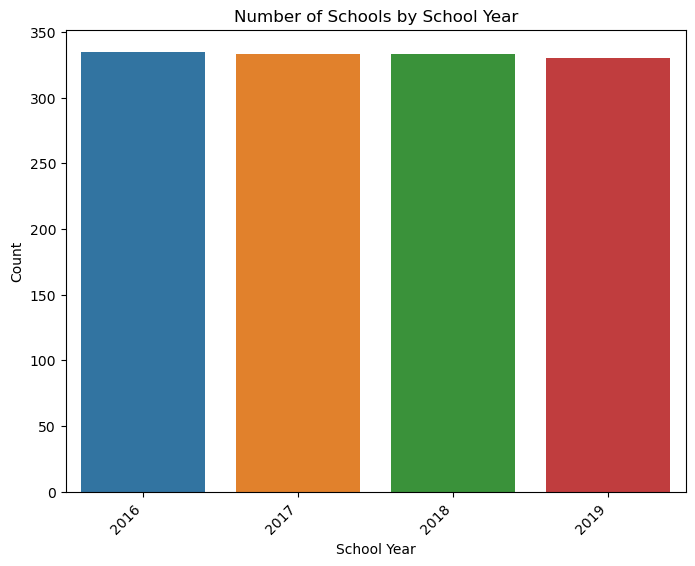

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the value counts for school_year
school_year_counts = iowa_public_school_enrollment_df['school_year'].value_counts()

# Create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=school_year_counts.index, y=school_year_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('School Year')
plt.ylabel('Count')
plt.title('Number of Schools by School Year')
plt.show()


### 7.3. Analysing district_name column

In [29]:
iowa_public_school_enrollment_df['district_name'].isnull().sum()

0

In [30]:
iowa_public_school_enrollment_df['district_name'].value_counts()

AGWSR                                    4
Osage                                    4
Olin Consolidated                        4
Okoboji                                  4
Ogden                                    4
                                        ..
Walnut                                   1
Alta-Aurelia                             1
North Fayette Valley                     1
Odebolt Arthur Battle Creek Ida Grove    1
West Fork                                1
Name: district_name, Length: 342, dtype: int64

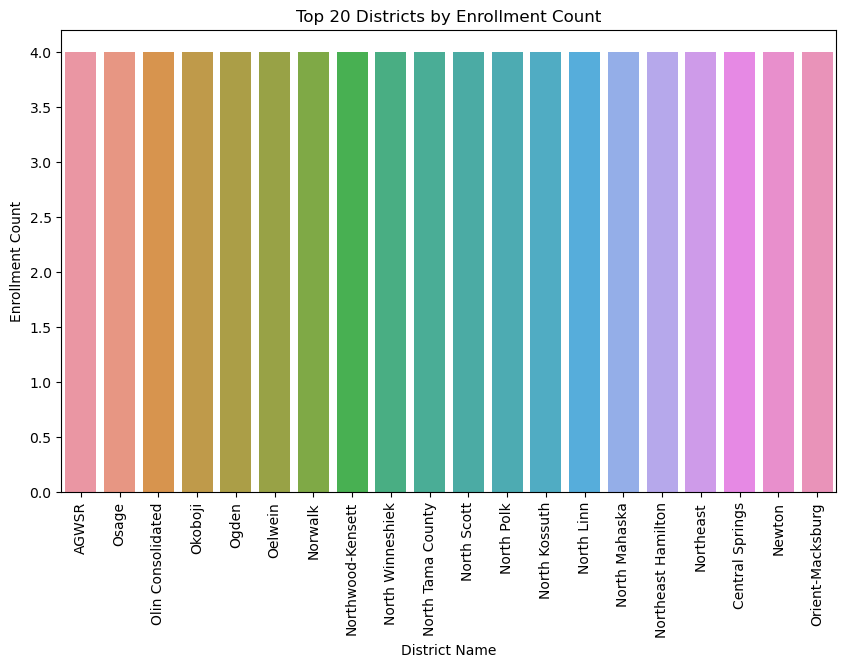

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 20 districts by enrollment count
top_districts = iowa_public_school_enrollment_df['district_name'].value_counts().head(20)

# Plot a bar graph of the top 20 districts by enrollment count
plt.figure(figsize=(10,6))
sns.barplot(x=top_districts.index, y=top_districts.values)
plt.xticks(rotation=90)
plt.xlabel('District Name')
plt.ylabel('Enrollment Count')
plt.title('Top 20 Districts by Enrollment Count')
plt.show()


### 7.4. Analysing district_number column

In [32]:
# Unique Identifier for the sitrict_name column

In [33]:
iowa_public_school_enrollment_df['district_number'].isnull().sum()

0

In [34]:
iowa_public_school_enrollment_df['district_number'].value_counts()

9       4
4995    4
4905    4
4890    4
4878    4
       ..
423     3
6591    3
504     3
6750    1
2205    1
Name: district_number, Length: 335, dtype: int64

In [35]:
# As it is redundunt for our data dropping it

In [36]:
iowa_public_school_enrollment_df.drop(columns = ['district_number'], axis = 1, inplace = True)

### 7.5. Analysing aea column


In [37]:
# AEA stands for "Area Education Agency" in the Iowa education system. An Area Education Agency is a regional support system for Iowa schools, serving as an intermediary between the Iowa Department of Education and local school districts. The state of Iowa is divided into nine AEA regions, each providing educational services and resources to schools within their region.

In [38]:
iowa_public_school_enrollment_df['aea'].isnull().sum()

0

In [39]:
iowa_public_school_enrollment_df['aea'].value_counts()

11    212
13    174
12    139
15    132
10    128
7     106
07    106
5      80
05     79
1      46
01     45
9      42
09     42
Name: aea, dtype: int64

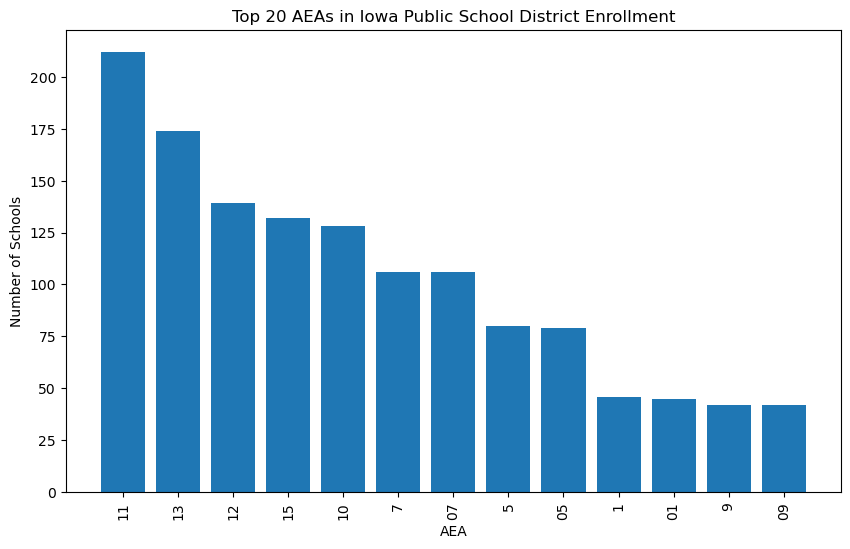

In [40]:
import matplotlib.pyplot as plt

counts = iowa_public_school_enrollment_df['aea'].value_counts().head(20)
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.xlabel('AEA')
plt.ylabel('Number of Schools')
plt.title('Top 20 AEAs in Iowa Public School District Enrollment')
plt.show()


### 7.6. Analysing county column


In [41]:
# county: The identity of county that the public school district is located in.
# we can drop this column for analysis
iowa_public_school_enrollment_df.drop(columns =['county'], axis = 1, inplace = True)

### 7.7. Analysing county_name column


In [42]:
iowa_public_school_enrollment_df['county_name'].isnull().sum()

0

In [43]:
iowa_public_school_enrollment_df['county_name'].unique()

array(['Hardin', 'Guthrie', 'Dallas', 'Plymouth', 'Buena Vista', 'Monroe',
       'Linn', 'Kossuth', 'Allamakee', 'Butler', 'Story', 'Jones',
       'Jackson', 'Polk', 'Emmet', 'Crawford', 'Cass', 'Audubon',
       'Cherokee', 'Pottawattam', 'Ida', 'Jasper', 'Grundy', 'Taylor',
       'Benton', 'Wright', 'Cedar', 'Scott', 'Wapello', 'Boone', 'Sioux',
       'Hancock', 'Poweshiek', 'Winnebago', 'Des Moines', 'Franklin',
       'Clinton', 'Warren', 'Carroll', 'Black Hawk', 'Appanoose', 'Lee',
       'Clayton', 'Decatur', 'Lyon', 'Lucas', 'Floyd', 'Page', 'Clarke',
       'Clay', 'Johnson', 'Cerro Gordo', 'Louisa', 'Adams', 'Union',
       'Davis', 'Winneshiek', 'Bremer', 'Ringgold', 'Dubuque', 'Harrison',
       'Madison', 'Buchanan', 'Marshall', 'Woodbury', 'Delaware',
       'Palo Alto', 'Iowa', 'Shelby', 'Jefferson', 'Fremont', 'Webster',
       'Humboldt', 'Mills', 'Adair', 'Tama', 'Van Buren', 'Dickinson',
       "O'Brien", 'Washington', 'Howard', 'Greene', 'Keokuk', 'Marion',
     

In [44]:
len(iowa_public_school_enrollment_df['county_name'].unique())

99

In [45]:
iowa_public_school_enrollment_df['county_name'].value_counts()

Linn           44
Polk           36
Pottawattam    29
Story          28
Bremer         26
               ..
Lucas           4
Adams           4
Davis           4
Jefferson       4
Osceola         4
Name: county_name, Length: 99, dtype: int64

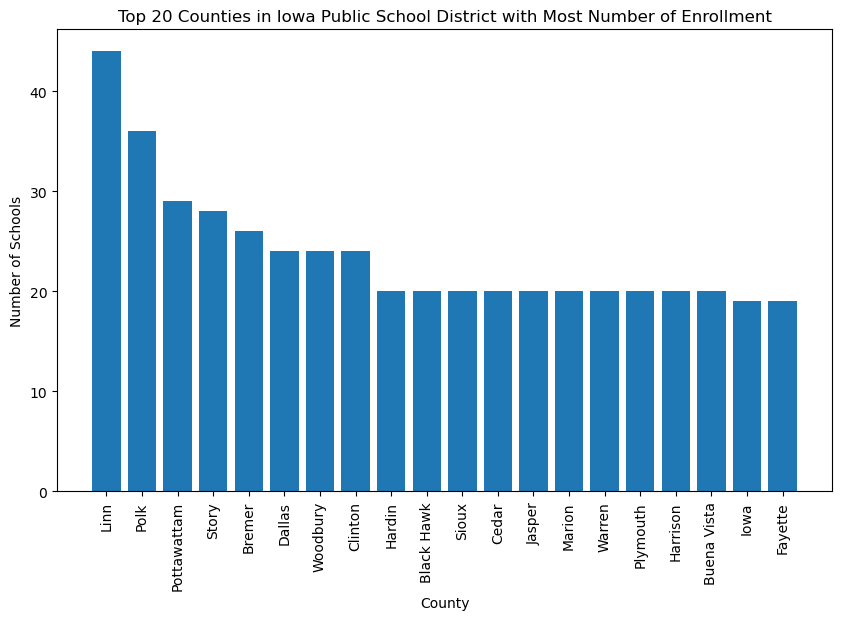

In [46]:
import matplotlib.pyplot as plt

counts = iowa_public_school_enrollment_df['county_name'].value_counts().head(20)
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Number of Schools')
plt.title('Top 20 Counties in Iowa Public School District with Most Number of Enrollment')
plt.show()

### 7.8. Analysing grade_9 column

In [47]:
iowa_public_school_enrollment_df['grade_9'] = iowa_public_school_enrollment_df['grade_9'].astype(int)

In [48]:
iowa_public_school_enrollment_df['grade_9'].isnull().sum()

0

In [49]:
print("Highest number of  grade_9 count: ", iowa_public_school_enrollment_df['grade_9'].max())
print("Lowest number of  grade_9 count: ", iowa_public_school_enrollment_df['grade_9'].min())


Highest number of  grade_9 count:  2384
Lowest number of  grade_9 count:  0


<AxesSubplot:xlabel='grade_9'>

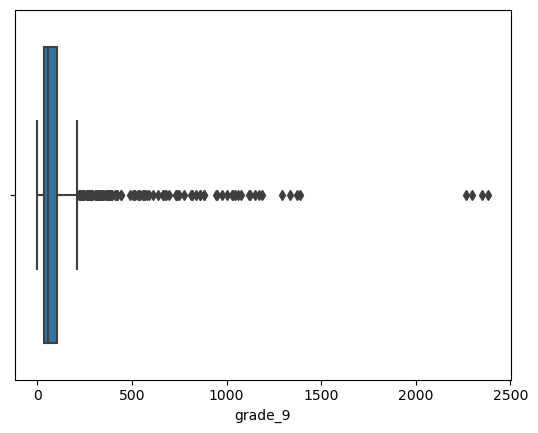

In [50]:
import seaborn as sns

sns.boxplot(x=iowa_public_school_enrollment_df['grade_9'])


### 7.9. Analysing grade_10 column

In [51]:
iowa_public_school_enrollment_df['grade_10'] = iowa_public_school_enrollment_df['grade_10'].astype(int)

In [52]:
iowa_public_school_enrollment_df['grade_10'].isnull().sum()

0

In [53]:
print("Highest number of  grade_10 count: ", iowa_public_school_enrollment_df['grade_10'].max())
print("Lowest number of  grade_10 count: ", iowa_public_school_enrollment_df['grade_10'].min())


Highest number of  grade_10 count:  2397
Lowest number of  grade_10 count:  0


<AxesSubplot:xlabel='grade_10'>

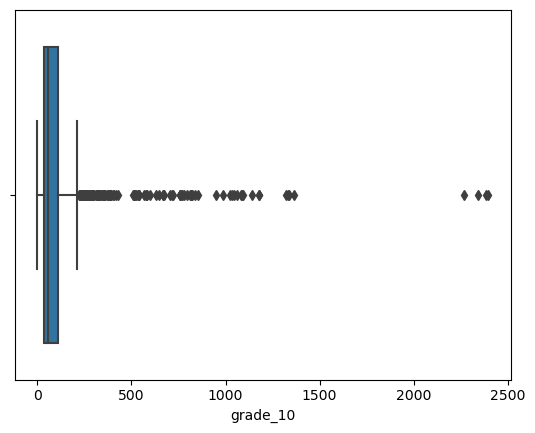

In [54]:
import seaborn as sns

sns.boxplot(x=iowa_public_school_enrollment_df['grade_10'])

### 7.10. Analysing grade_11 column

In [55]:
iowa_public_school_enrollment_df['grade_11'] = iowa_public_school_enrollment_df['grade_11'].astype(int)

In [56]:
iowa_public_school_enrollment_df['grade_11'].isnull().sum()

0

In [57]:
print("Highest number of  grade_11 count: ", iowa_public_school_enrollment_df['grade_11'].max())
print("Lowest number of  grade_11 count: ", iowa_public_school_enrollment_df['grade_11'].min())


Highest number of  grade_11 count:  2386
Lowest number of  grade_11 count:  0


<AxesSubplot:xlabel='grade_11'>

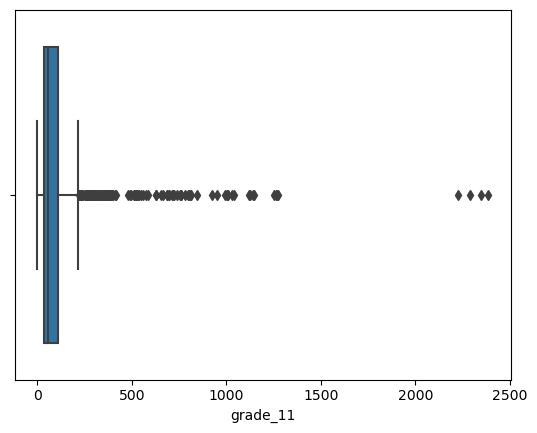

In [58]:
import seaborn as sns

sns.boxplot(x=iowa_public_school_enrollment_df['grade_11'])

### 7.11. Analysing grade_12 column

In [59]:
iowa_public_school_enrollment_df['grade_12'] = iowa_public_school_enrollment_df['grade_12'].astype(int)

In [60]:
iowa_public_school_enrollment_df['grade_12'].isnull().sum()

0

In [61]:
print("Highest number of  grade_12 count: ", iowa_public_school_enrollment_df['grade_12'].max())
print("Lowest number of  grade_12 count: ", iowa_public_school_enrollment_df['grade_12'].min())


Highest number of  grade_12 count:  2574
Lowest number of  grade_12 count:  0


<AxesSubplot:xlabel='grade_12'>

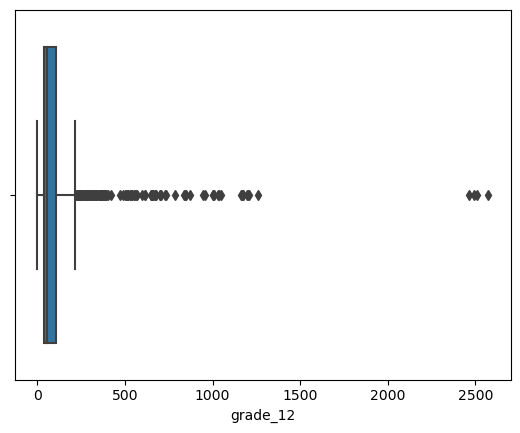

In [62]:
import seaborn as sns

sns.boxplot(x=iowa_public_school_enrollment_df['grade_12'])

### 7.12. Analysing  total_k12  and total_pk12 

In [63]:
# total_k12: The total number of students enrolled in grades K-12.
# total_pk12: The total number of students enrolled in Pre-K through 12th grade.

# As these columns as not important to our analysis dropping this column
iowa_public_school_enrollment_df = iowa_public_school_enrollment_df.drop(columns = ['total_k12','total_pk12'], axis = 1)

### 7.13. Analysing Multi-Race_male column


In [64]:
iowa_public_school_enrollment_df['multi_race_male'] = iowa_public_school_enrollment_df['multi_race_male'].astype(int)

In [65]:
iowa_public_school_enrollment_df['multi_race_male'].isnull().sum()

0

In [66]:
print("Highest number of  multi_race_male count: ", iowa_public_school_enrollment_df['multi_race_male'].max())
print("Lowest number of  multi_race_male count: ", iowa_public_school_enrollment_df['multi_race_male'].min())


Highest number of  multi_race_male count:  1070
Lowest number of  multi_race_male count:  0


### 7.14. Analysing multi_race_female column


In [67]:
iowa_public_school_enrollment_df['multi_race_female'] = iowa_public_school_enrollment_df['multi_race_female'].astype(int)


In [68]:
iowa_public_school_enrollment_df['multi_race_female'].isnull().sum()


0

In [69]:
print("Highest number of  multi_race_female count: ", iowa_public_school_enrollment_df['multi_race_female'].max())
print("Lowest number of  multi_race_female count: ", iowa_public_school_enrollment_df['multi_race_female'].min())


Highest number of  multi_race_female count:  1180
Lowest number of  multi_race_female count:  0


### 7.15. Analysing Multi-Race Total column


In [70]:
iowa_public_school_enrollment_df['multi_race_total'] = iowa_public_school_enrollment_df['multi_race_total'].astype(int)


In [71]:
iowa_public_school_enrollment_df['multi_race_total'].isnull().sum()


0

In [72]:
print("Highest number of  multi_race_total count: ", iowa_public_school_enrollment_df['multi_race_total'].max())
print("Lowest number of  multi_race_total count: ", iowa_public_school_enrollment_df['multi_race_total'].min())


Highest number of  multi_race_total count:  2224
Lowest number of  multi_race_total count:  0


In [73]:
iowa_public_school_enrollment_df.columns

Index(['school_year', 'district_name', 'aea', 'county_name', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'hispanic_male', 'hispanic_female',
       'total_hispanic', 'native_american_male', 'native_american_female',
       'native_american_total', 'asian_male', 'asian_female', 'asian_total',
       'black_male', 'black_female', 'black_total', 'pacific_islander_male',
       'pacific_islander_female', 'pacific_islander_total', 'white_male',
       'white_female', 'white_total', 'multi_race_male', 'multi_race_female',
       'multi_race_total', 'total_male', 'total_female'],
      dtype='object')

#### All other columns share the similar characteristics. So, Analysing features of interest


## 8. Analysing on the Data with Visualizations

### 8.1. Analysing on Enrollment by Ethnicity and Gender

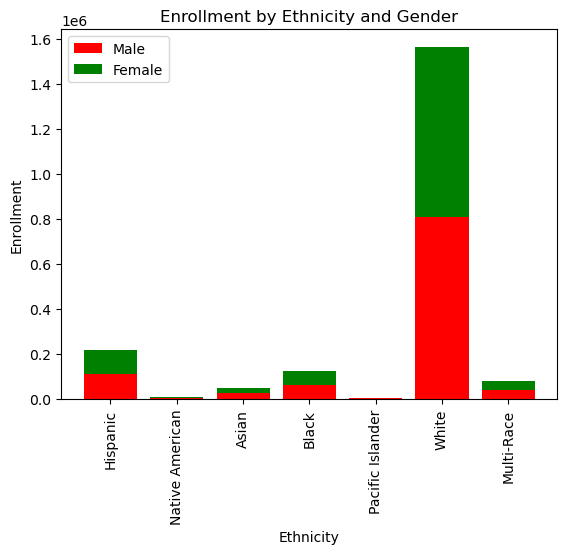

In [74]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the data for each racial/ethnic group and gender
ethnicity_labels = ['Hispanic', 'Native American', 'Asian', 'Black', 'Pacific Islander', 'White', 'Multi-Race']
male_data = [iowa_public_school_enrollment_df['hispanic_male'].sum(), 
             iowa_public_school_enrollment_df['native_american_male'].sum(),
             iowa_public_school_enrollment_df['asian_male'].sum(),
             iowa_public_school_enrollment_df['black_male'].sum(),
             iowa_public_school_enrollment_df['pacific_islander_male'].sum(),
             iowa_public_school_enrollment_df['white_male'].sum(),
             iowa_public_school_enrollment_df['multi_race_male'].sum()]
female_data = [iowa_public_school_enrollment_df['hispanic_female'].sum(), 
               iowa_public_school_enrollment_df['native_american_female'].sum(),
               iowa_public_school_enrollment_df['asian_female'].sum(),
               iowa_public_school_enrollment_df['black_female'].sum(),
               iowa_public_school_enrollment_df['pacific_islander_female'].sum(),
               iowa_public_school_enrollment_df['white_female'].sum(),
               iowa_public_school_enrollment_df['multi_race_female'].sum()]

colors = ['red', 'green']

fig, ax = plt.subplots()
ax.bar(ethnicity_labels, male_data, color=colors[0])
ax.bar(ethnicity_labels, female_data, color=colors[1], bottom=male_data)

plt.title('Enrollment by Ethnicity and Gender')
plt.xlabel('Ethnicity')
plt.ylabel('Enrollment')
ax.legend(['Male', 'Female'])
ax.set_xticklabels(ethnicity_labels, rotation=90)

plt.show()


### 8.2. Analysing on Enrollment by Grade Level Over Time

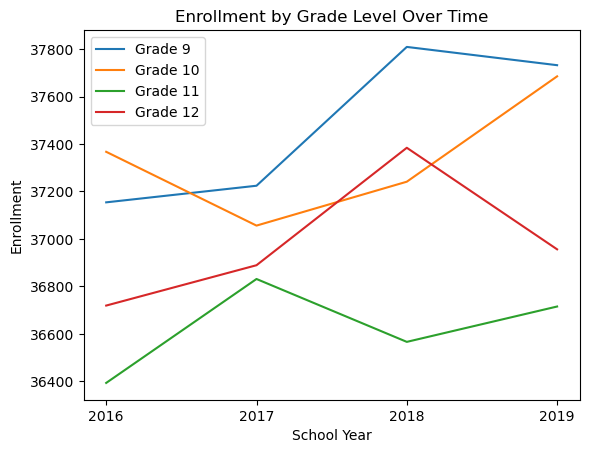

In [75]:
import matplotlib.pyplot as plt

# Grouping the data by school year and sum the enrollment counts for each grade level
enrollment_by_grade = iowa_public_school_enrollment_df.groupby('school_year')[['grade_9', 'grade_10', 'grade_11', 'grade_12']].sum()

plt.plot(enrollment_by_grade.index, enrollment_by_grade['grade_9'], label='Grade 9')
plt.plot(enrollment_by_grade.index, enrollment_by_grade['grade_10'], label='Grade 10')
plt.plot(enrollment_by_grade.index, enrollment_by_grade['grade_11'], label='Grade 11')
plt.plot(enrollment_by_grade.index, enrollment_by_grade['grade_12'], label='Grade 12')

plt.xlabel('School Year')
plt.ylabel('Enrollment')
plt.title('Enrollment by Grade Level Over Time')
plt.legend()

plt.show()


In [76]:
enrollment_by_grade = iowa_public_school_enrollment_df.groupby('school_year')[['grade_9', 'grade_10', 'grade_11', 'grade_12']].sum()
enrollment_by_grade

grade_9  grade_10  grade_11  grade_12
school_year                                       
2016           37154     37367     36393     36719
2017           37224     37056     36831     36889
2018           37809     37241     36566     37384
2019           37732     37685     36715     36956

### 8.3. Top 20 Enrollment by District and Grade Level

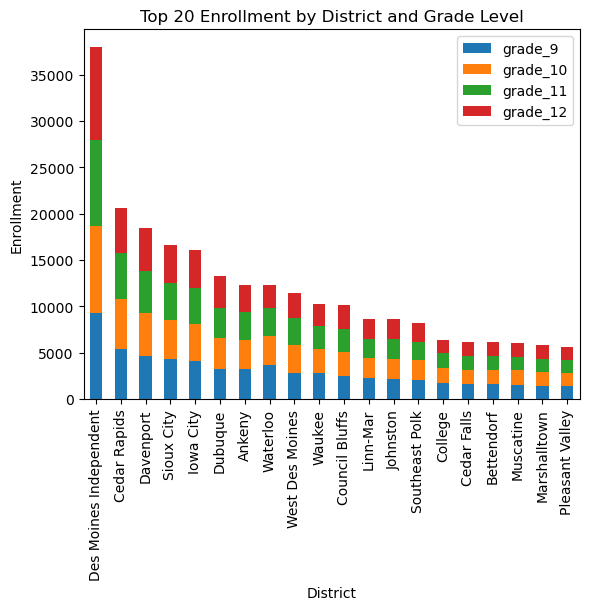

In [77]:
import numpy as np

# Grouping the data by district and sum the enrollment counts for each grade level
enrollment_by_district = iowa_public_school_enrollment_df.groupby('district_name')[['grade_9', 'grade_10', 'grade_11', 'grade_12']].sum()

enrollment_by_district = enrollment_by_district.loc[enrollment_by_district.sum(axis=1).sort_values(ascending=False).head(20).index]

enrollment_by_district.plot(kind='bar', stacked=True)

plt.xlabel('District')
plt.ylabel('Enrollment')
plt.title('Top 20 Enrollment by District and Grade Level')

plt.show()


In [78]:
enrollment_by_district

grade_9  grade_10  grade_11  grade_12
district_name                                                
Des Moines Independent     9300      9392      9249     10046
Cedar Rapids               5395      5355      5056      4839
Davenport                  4631      4593      4535      4707
Sioux City                 4260      4247      4040      4017
Iowa City                  4080      4025      3913      4014
Dubuque                    3268      3300      3255      3401
Ankeny                     3286      3102      2963      2949
Waterloo                   3634      3187      2979      2490
West Des Moines            2846      3004      2899      2681
Waukee                     2768      2634      2474      2380
Council Bluffs             2511      2540      2467      2626
Linn-Mar                   2219      2200      2107      2080
Johnston                   2190      2161      2119      2132
Southeast Polk             2075      2087      2013      2030
College                    1677      1640      1607      1453
Cedar Falls                1593      1514      1508      1555
Bettendorf                 1604      1510      1504      1504
Muscatine                  1557      1532      1446      1454
Marshalltown               1436      1469      1447      1482
Pleasant Valley            1418      1425      1375      1355

### 8.4. Total Enrollment by Gender for Each District

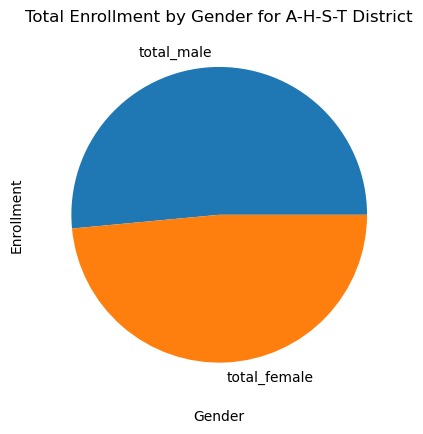

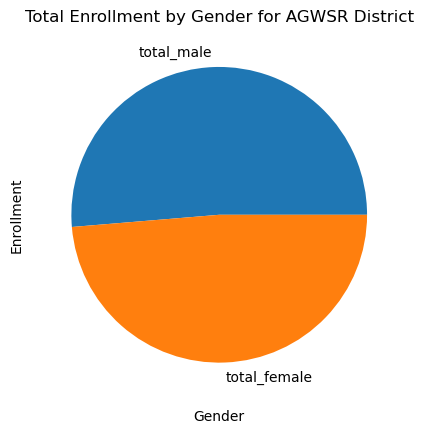

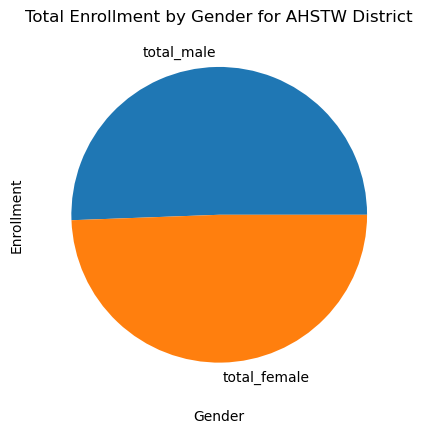

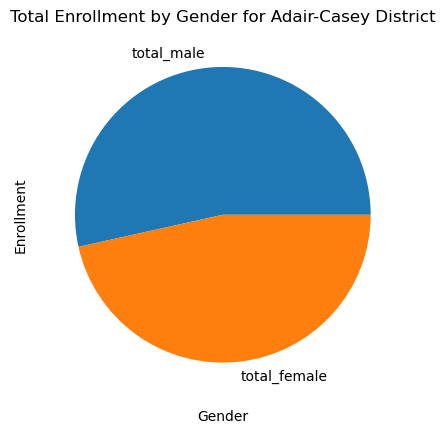

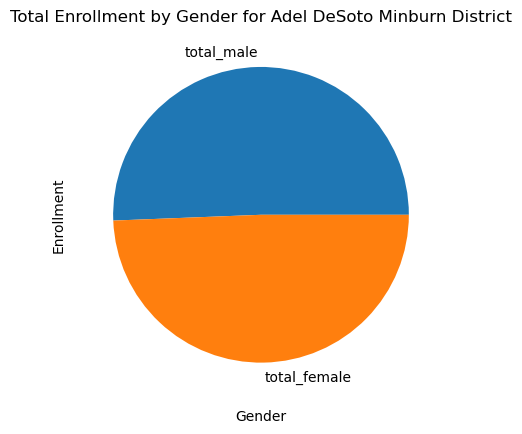

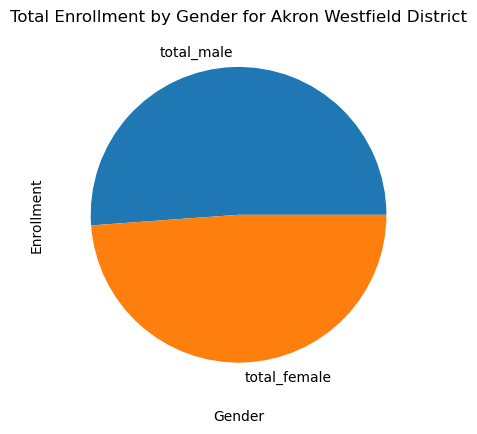

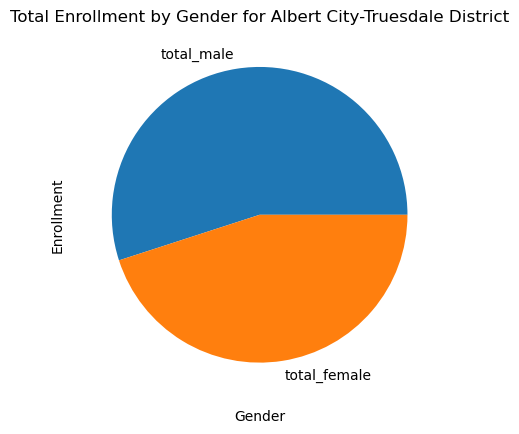

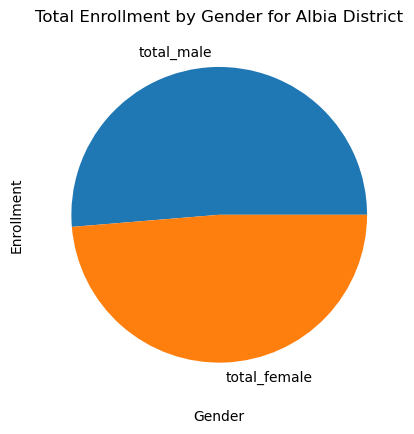

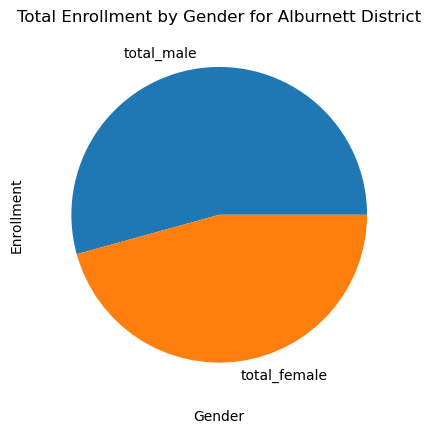

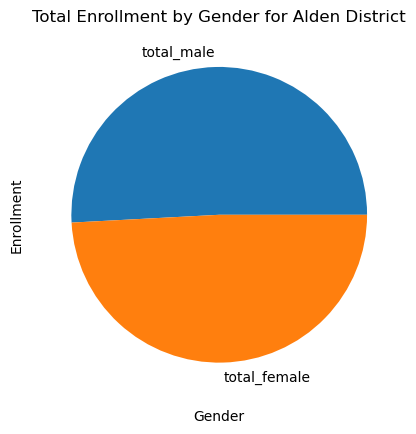

In [79]:
enrollment_by_district_gender = iowa_public_school_enrollment_df.groupby('district_name')[['total_male', 'total_female']].sum()

# Ploting the stacked bar chart for each district's total male and female enrollment
for district in enrollment_by_district_gender.index[:10]:
    enrollment_by_district_gender.loc[district].plot(kind='pie', stacked=True)
    plt.xlabel('Gender')
    plt.ylabel('Enrollment')
    plt.title(f'Total Enrollment by Gender for {district} District')
    plt.show()

### 8.5. County, Grade and sum of enrollments

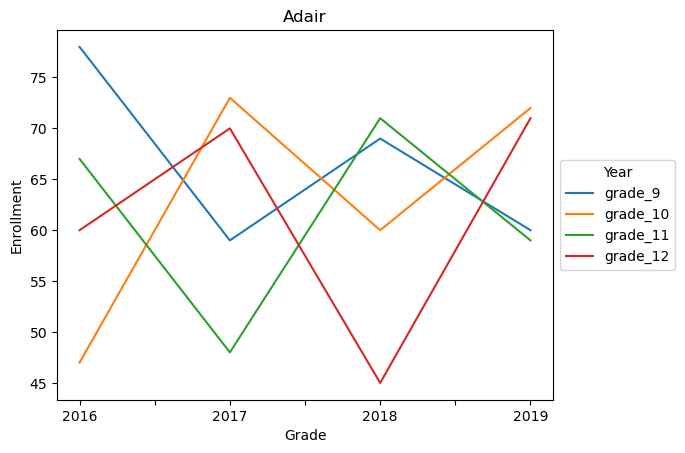

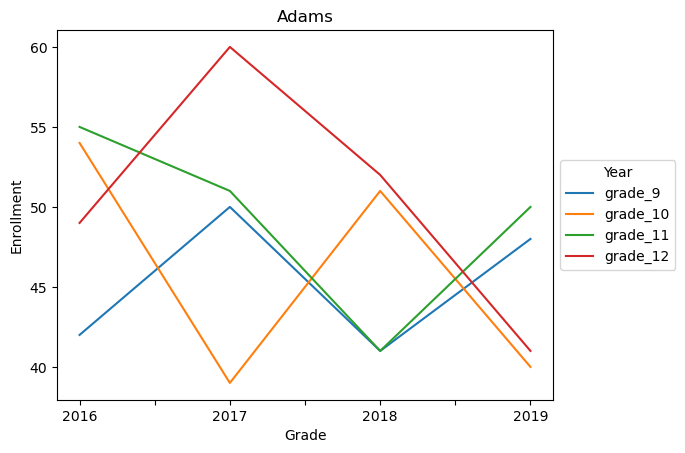

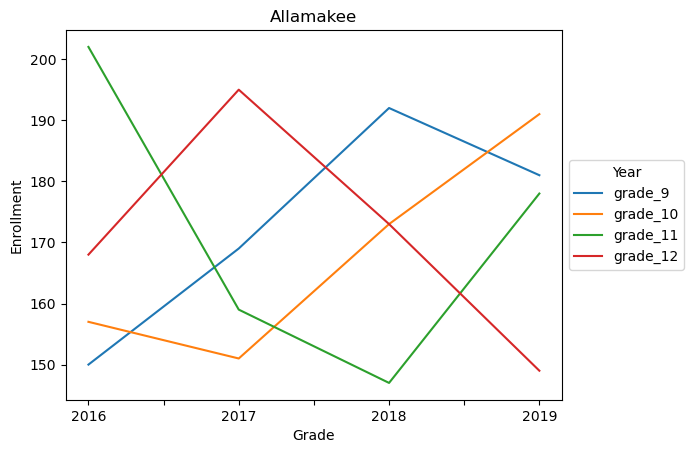

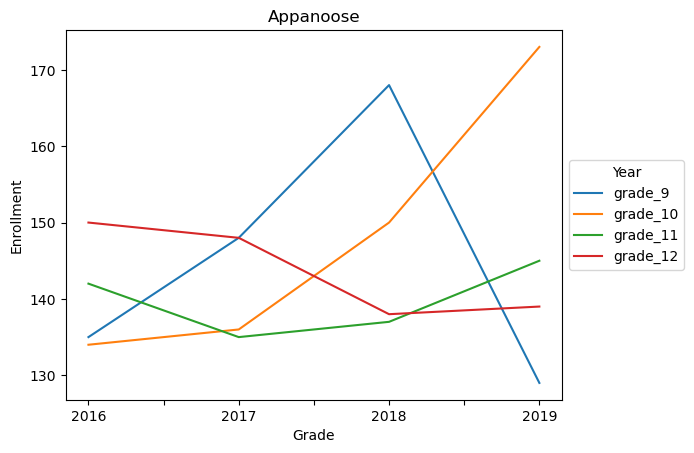

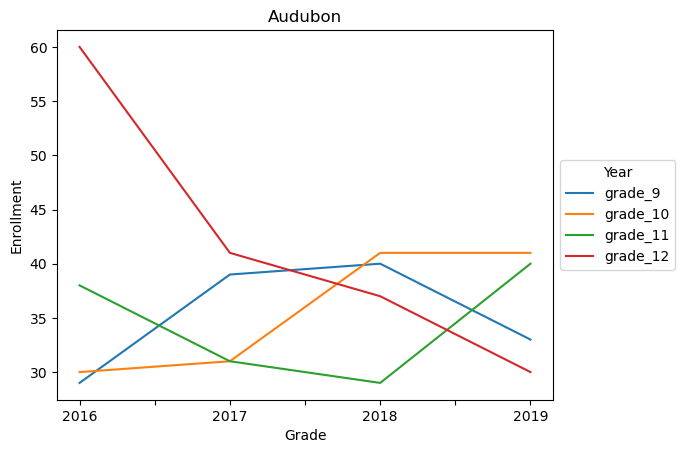

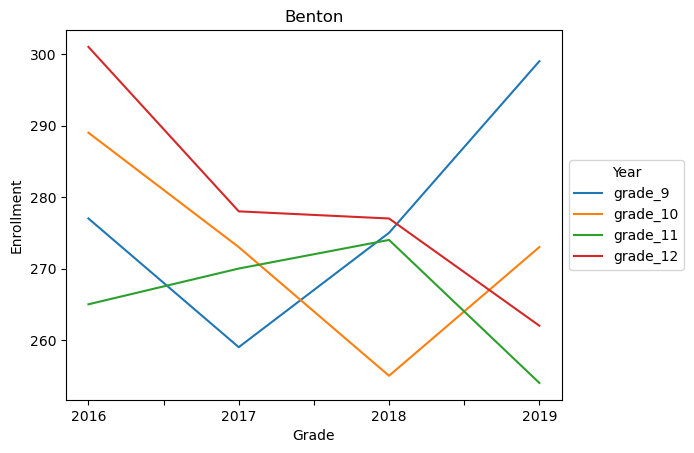

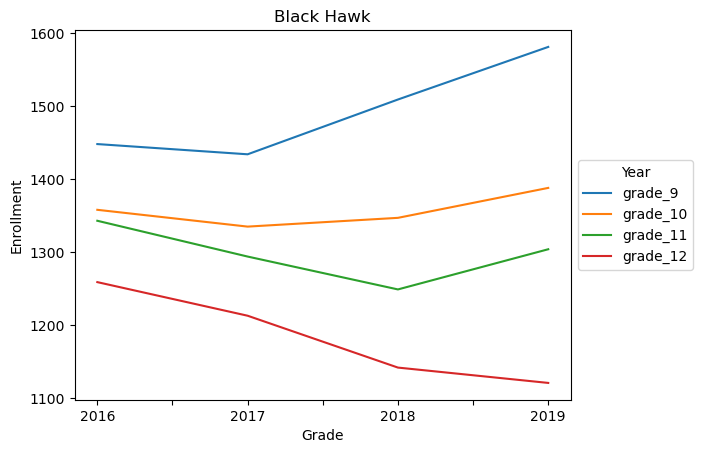

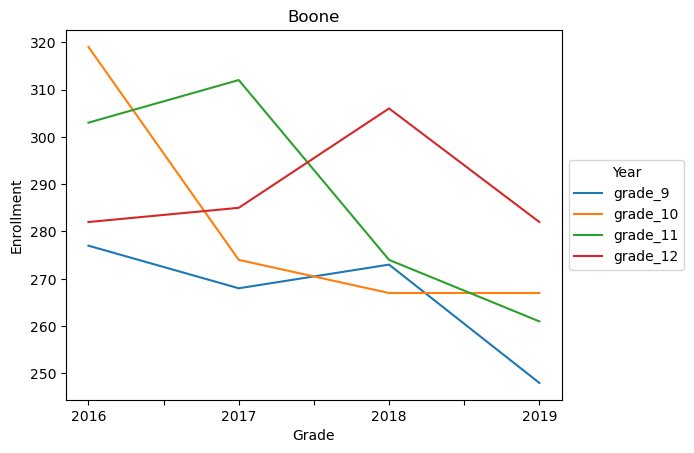

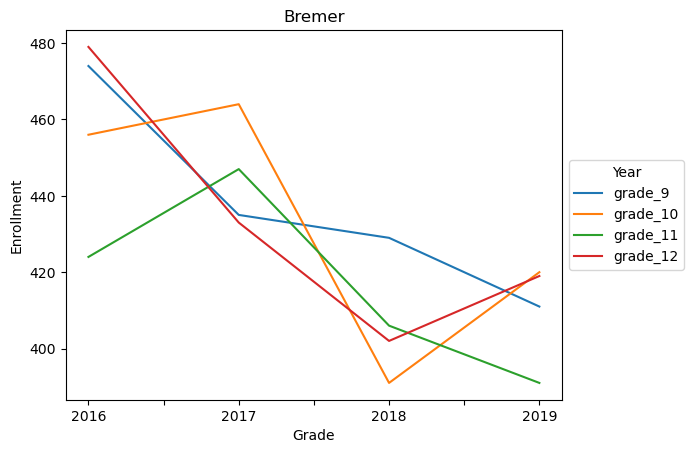

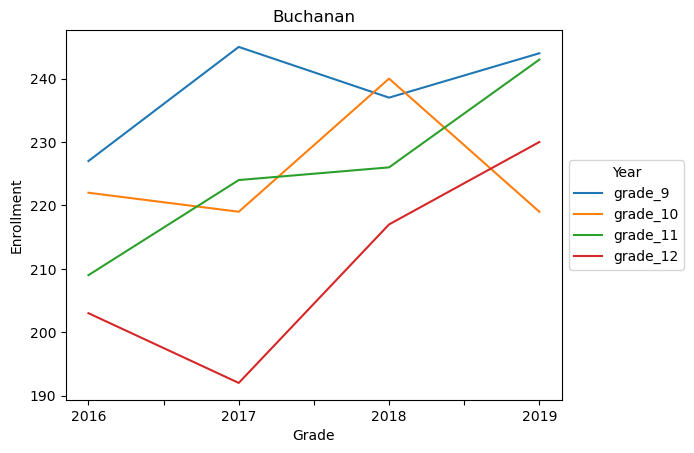

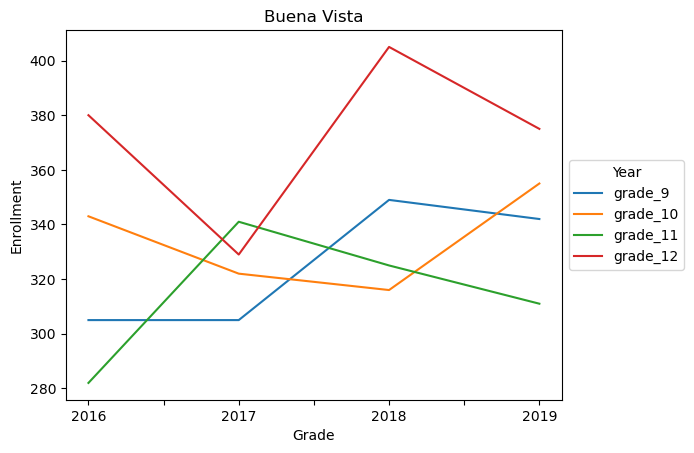

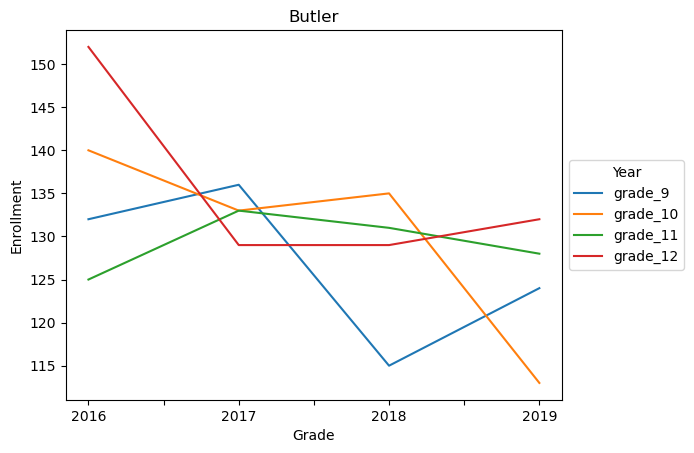

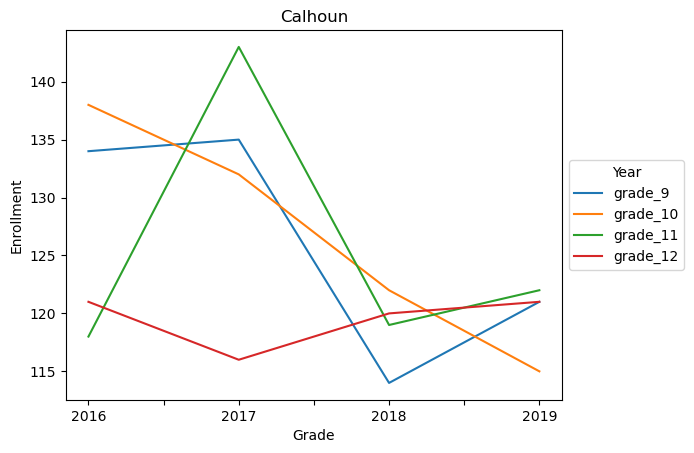

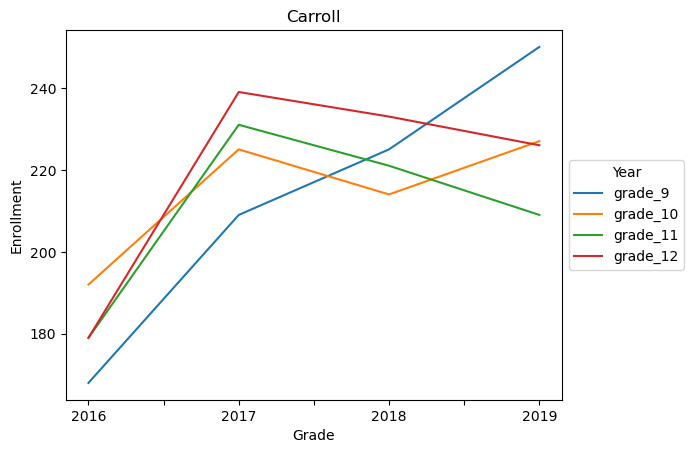

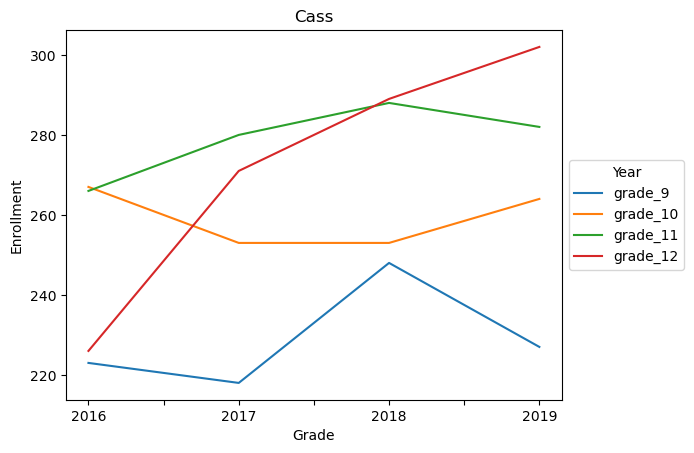

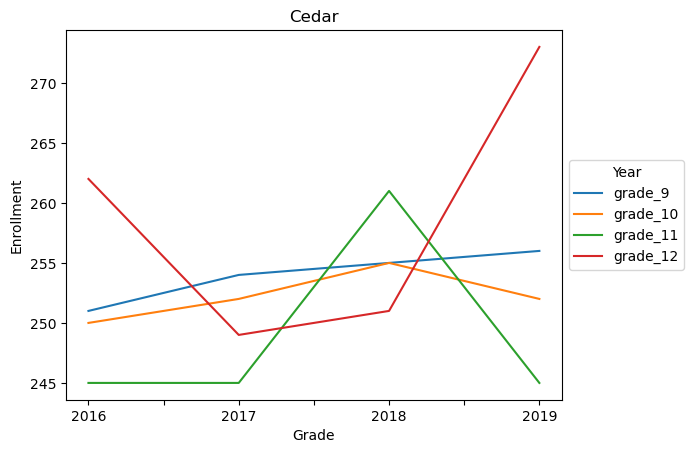

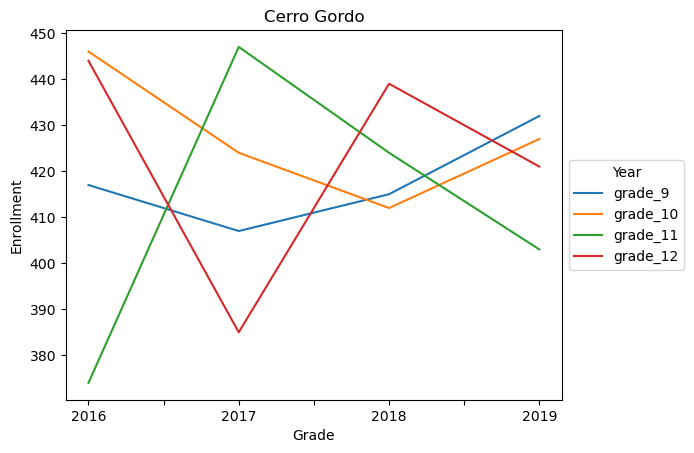

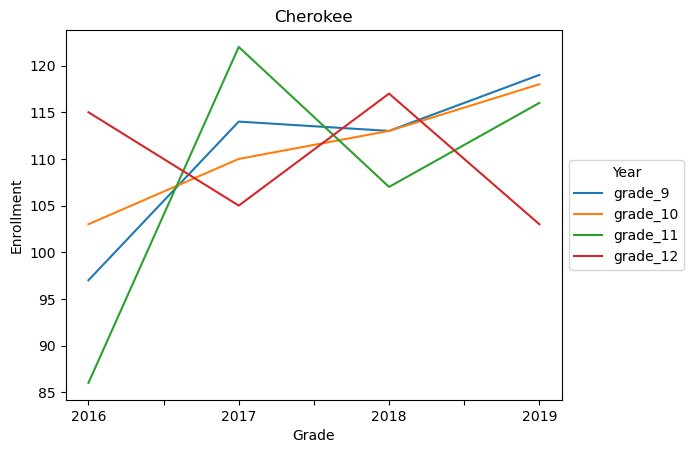

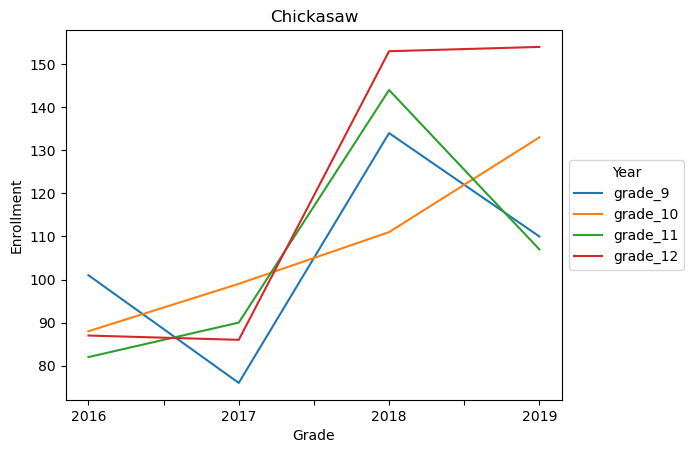

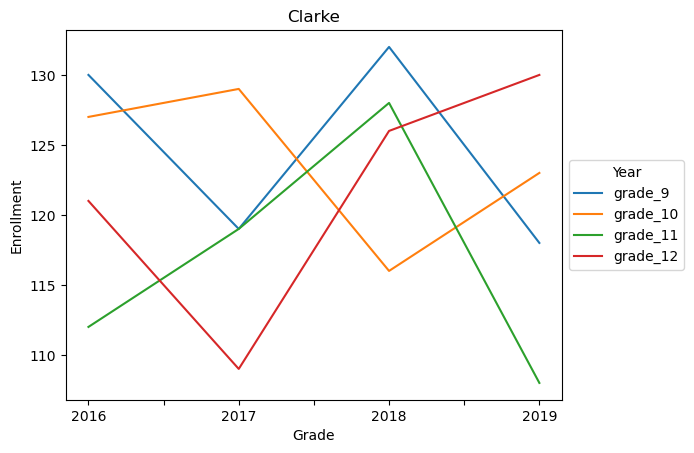

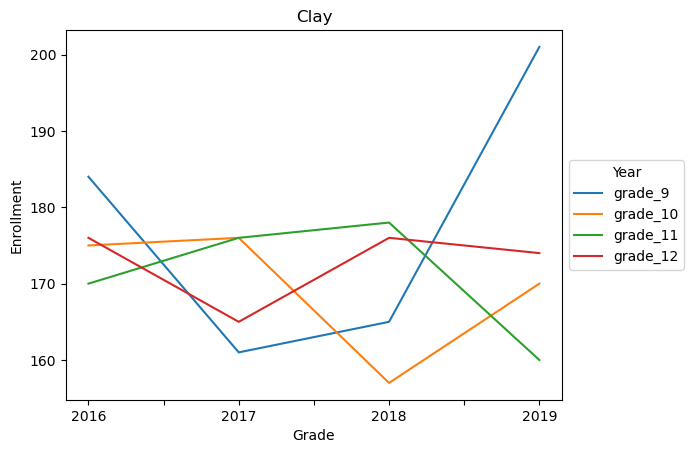

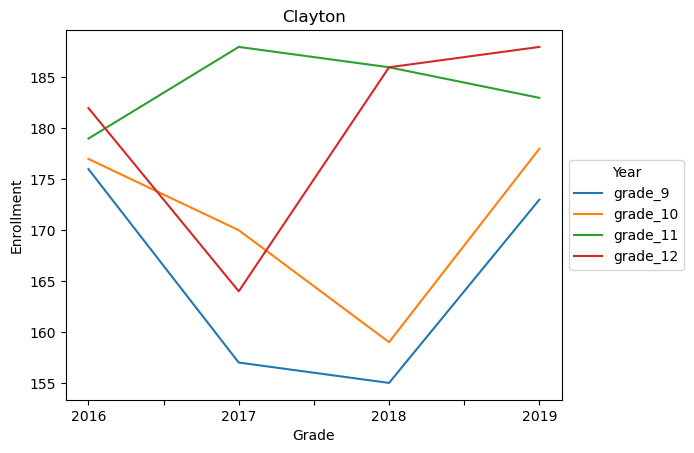

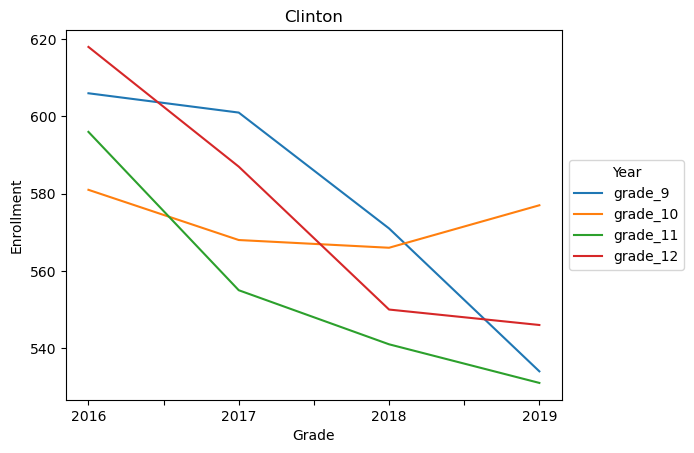

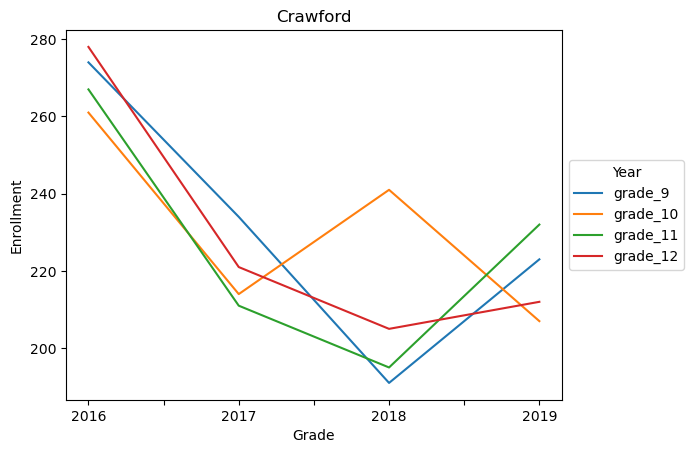

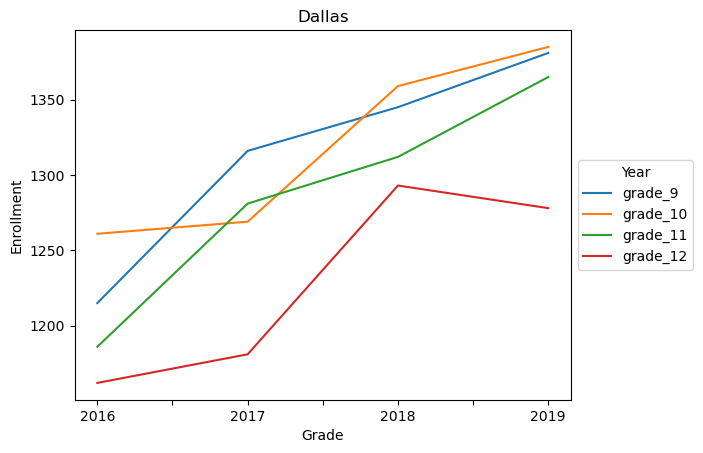

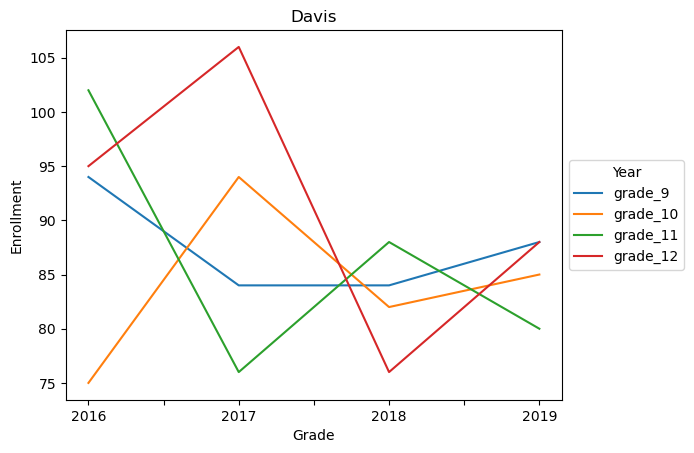

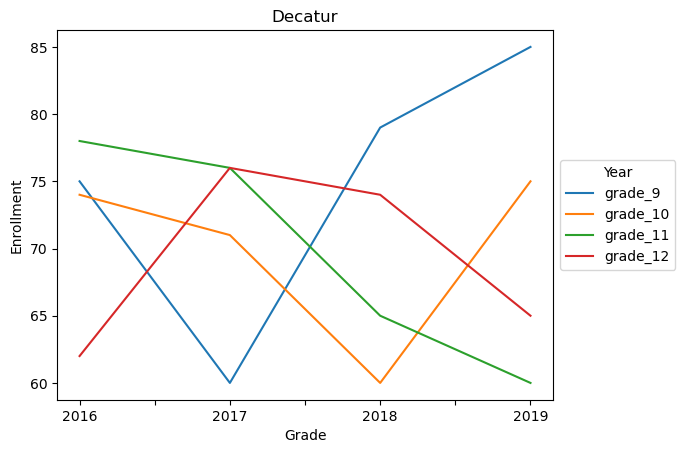

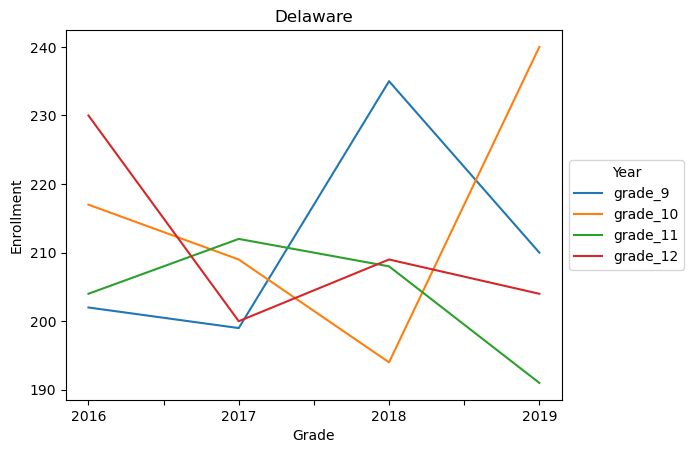

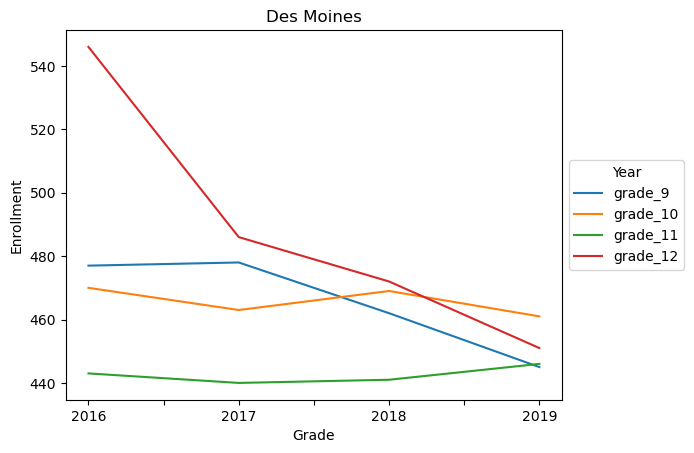

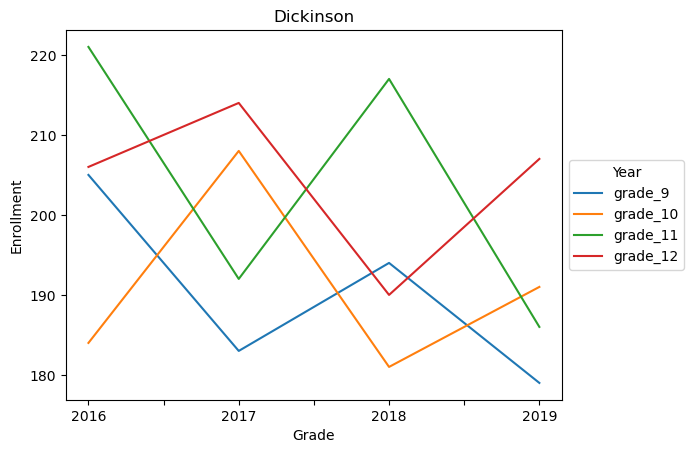

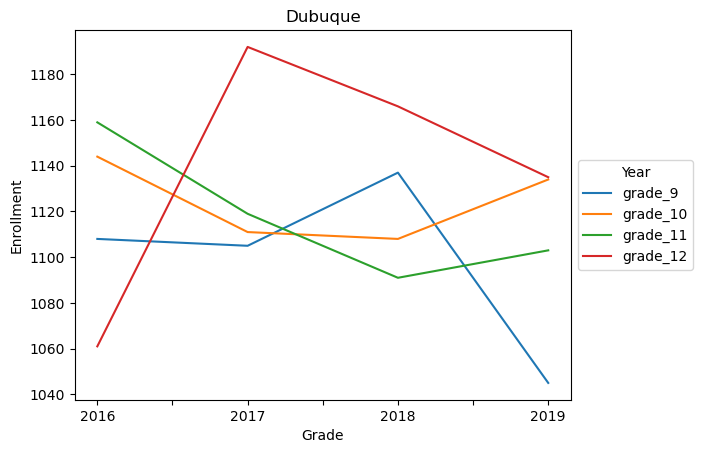

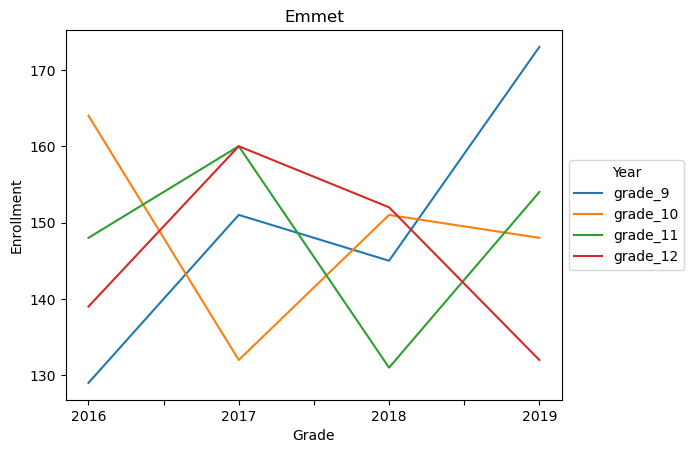

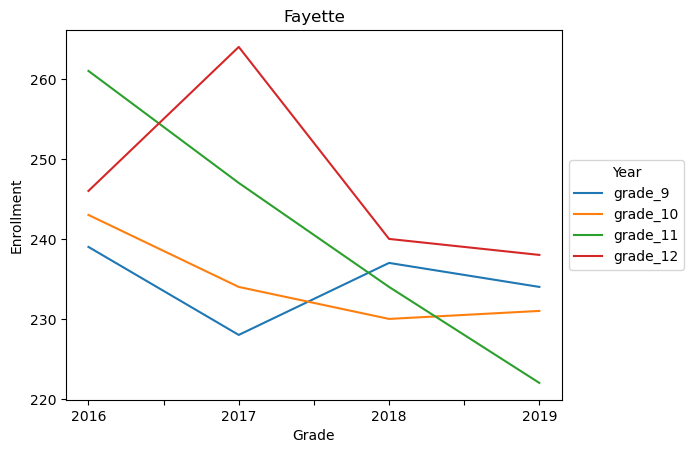

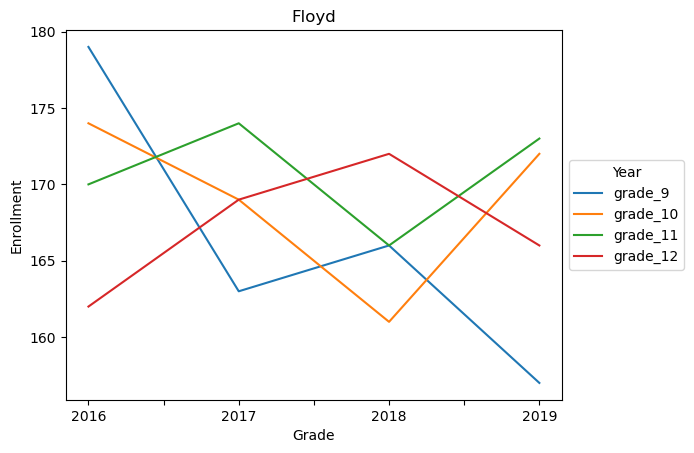

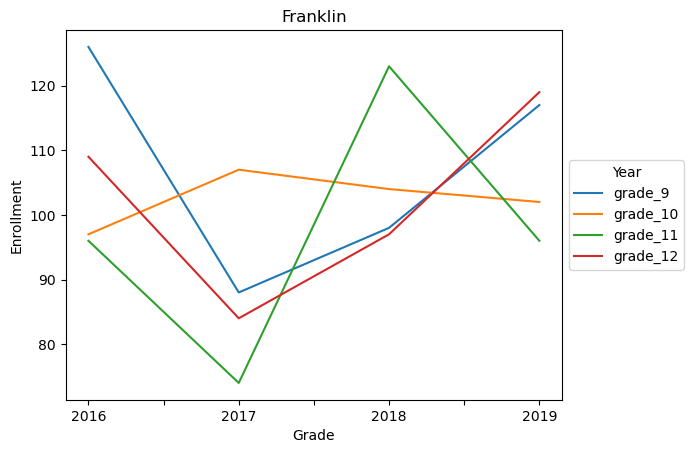

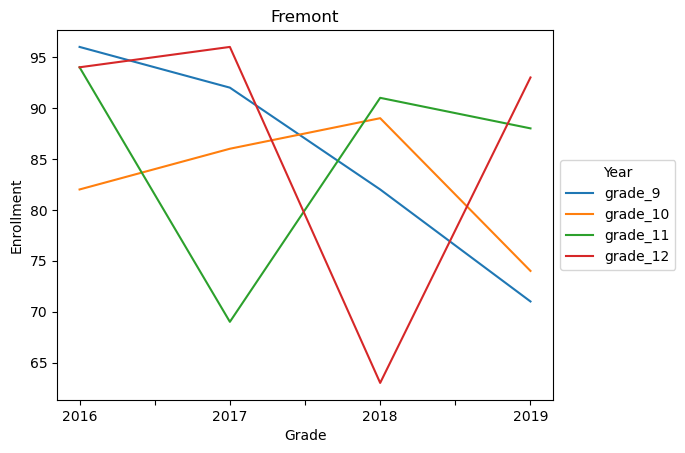

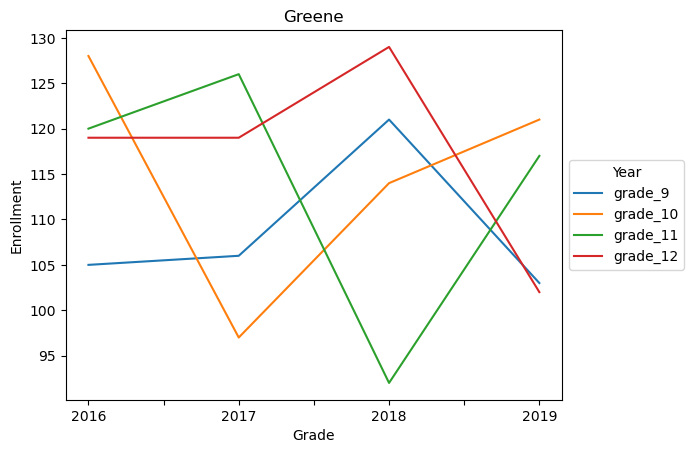

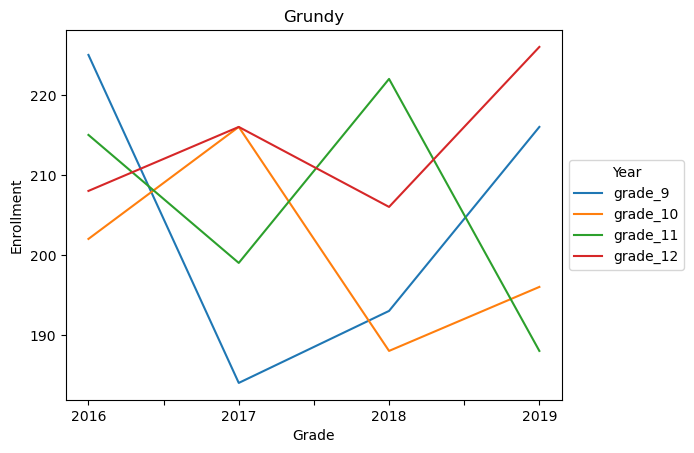

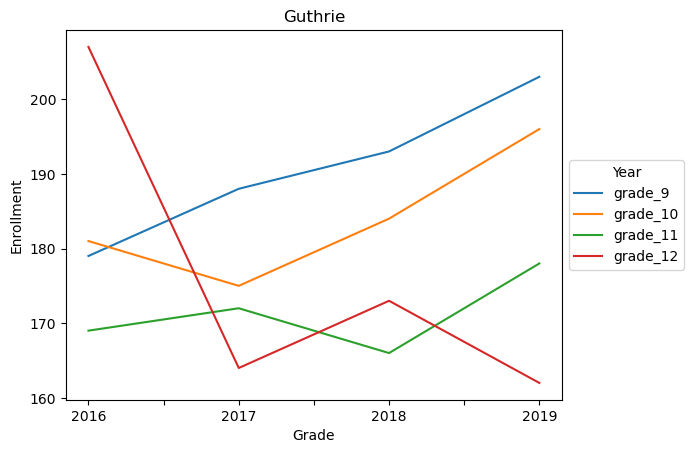

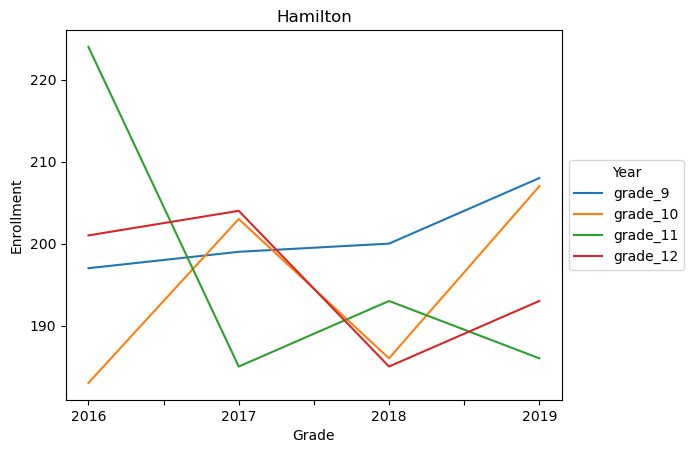

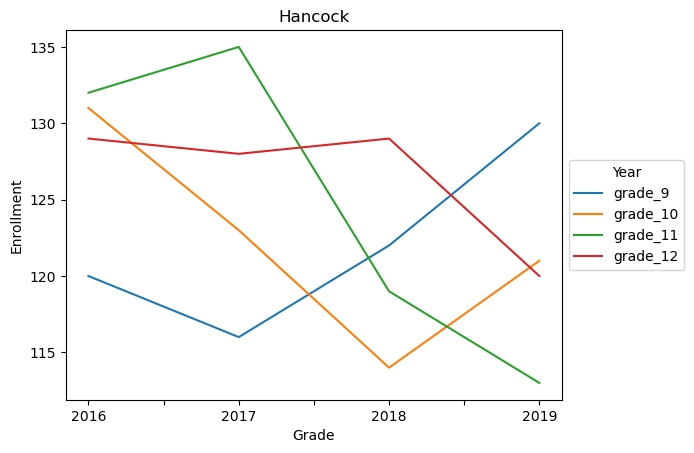

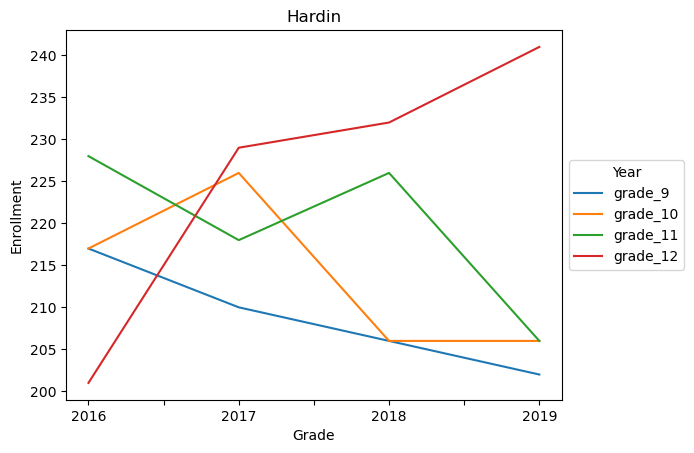

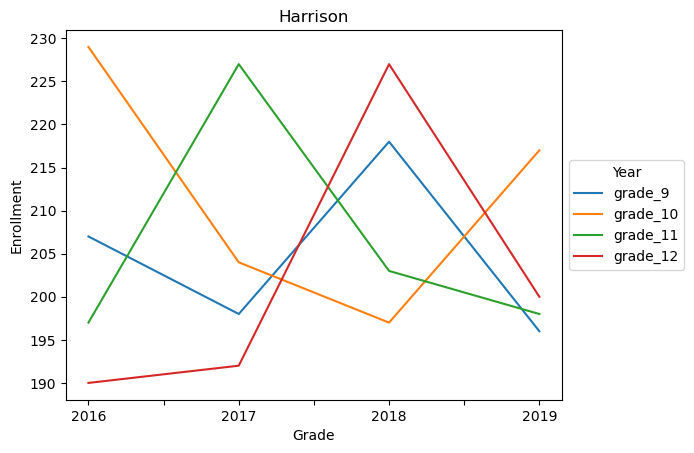

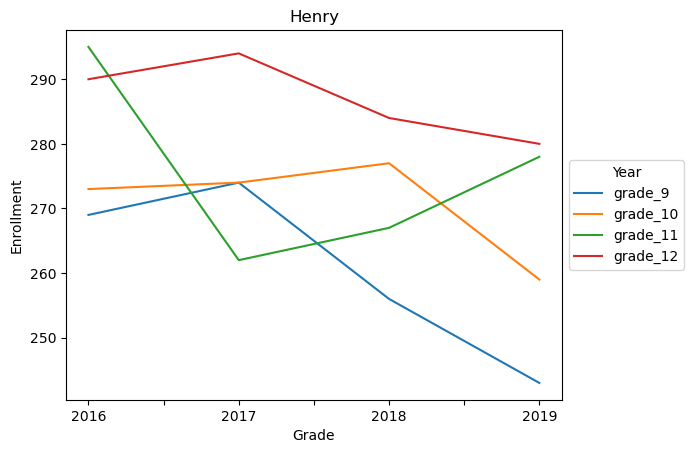

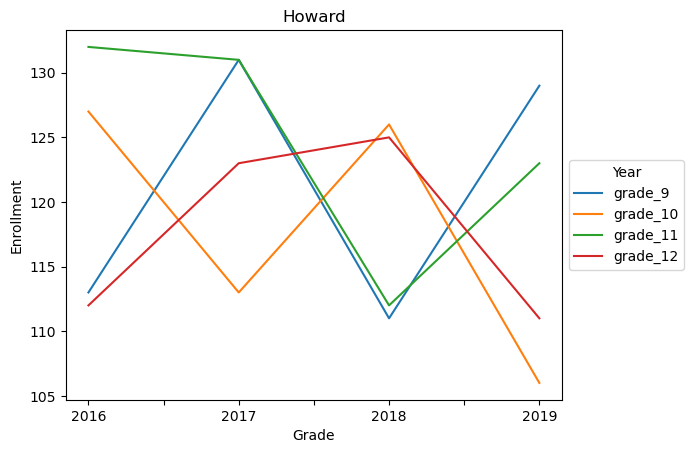

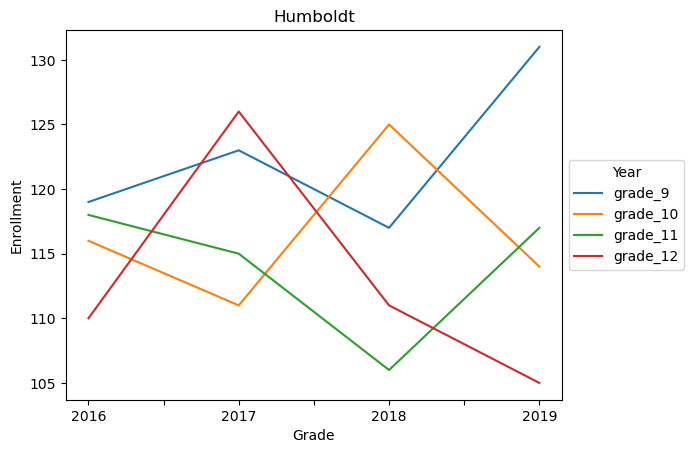

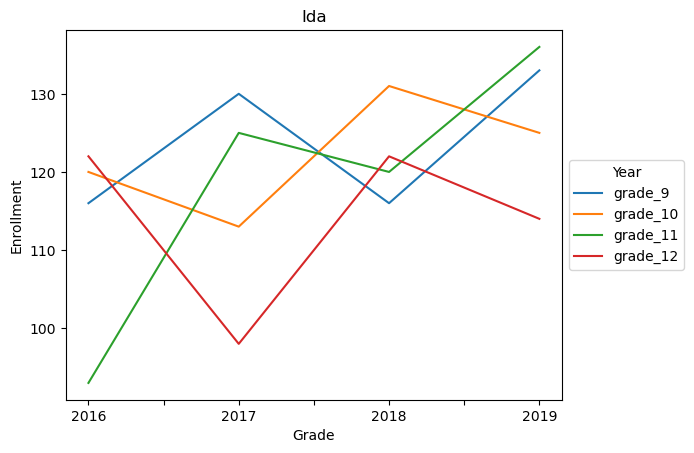

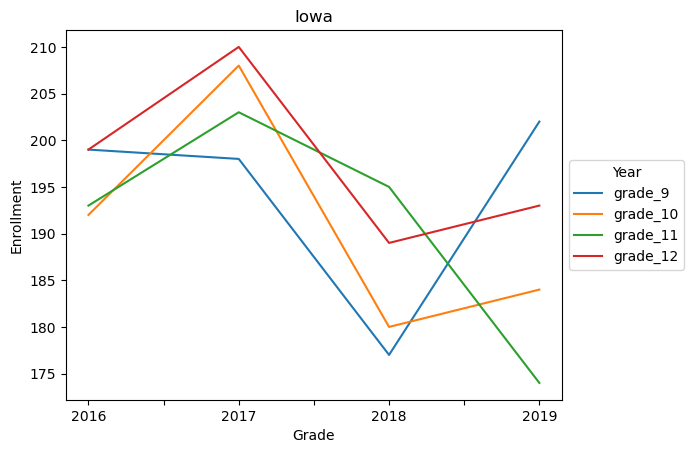

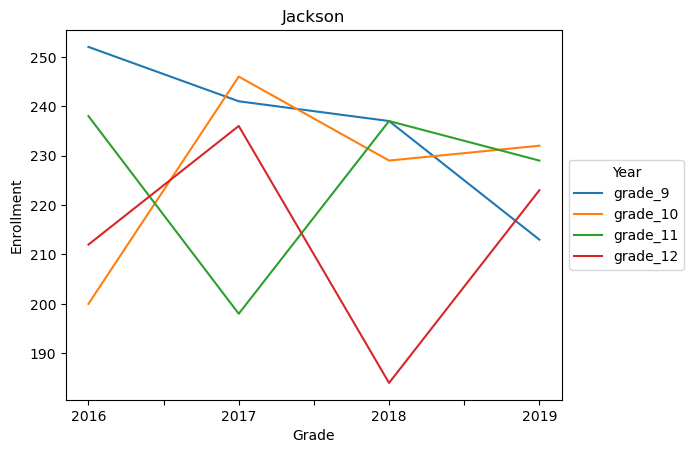

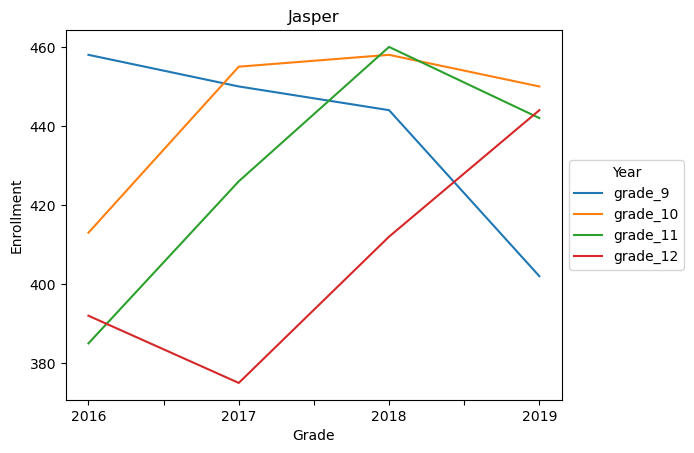

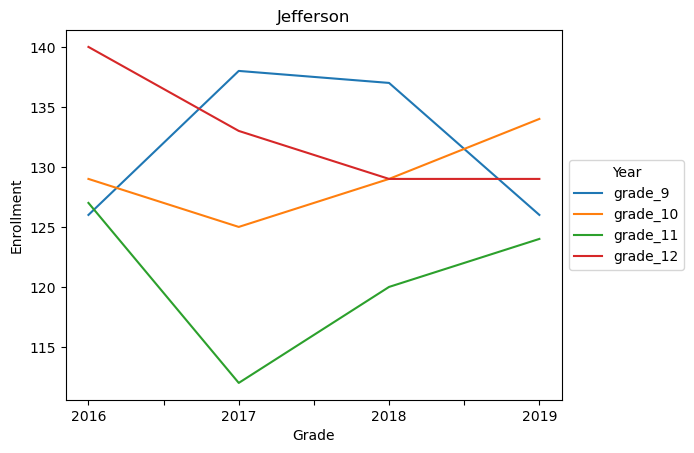

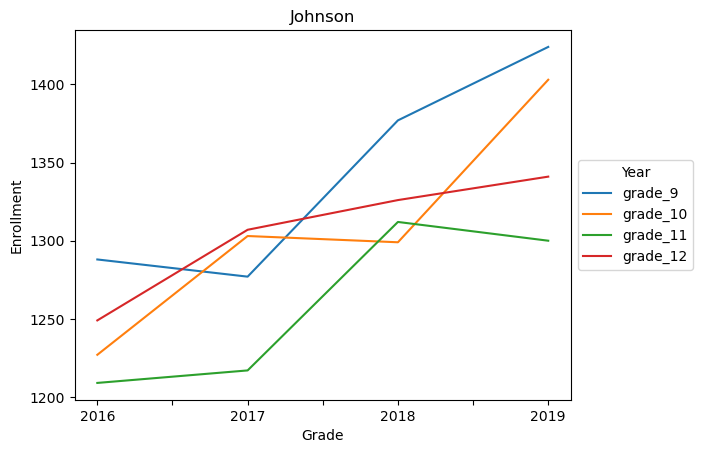

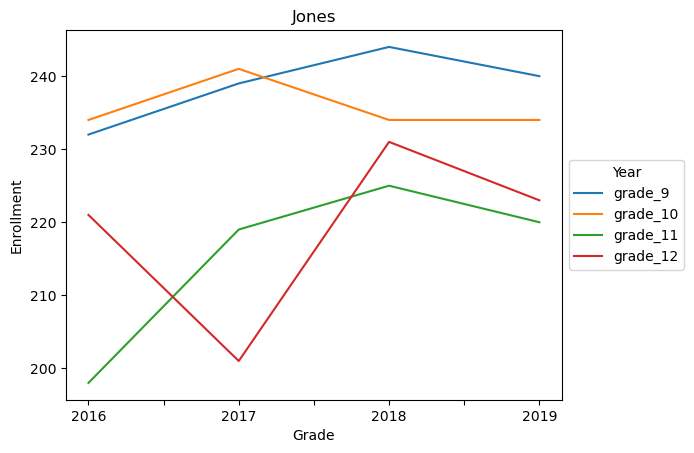

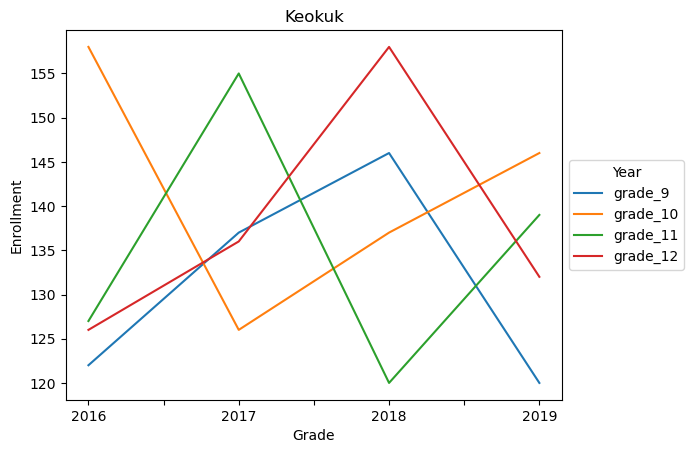

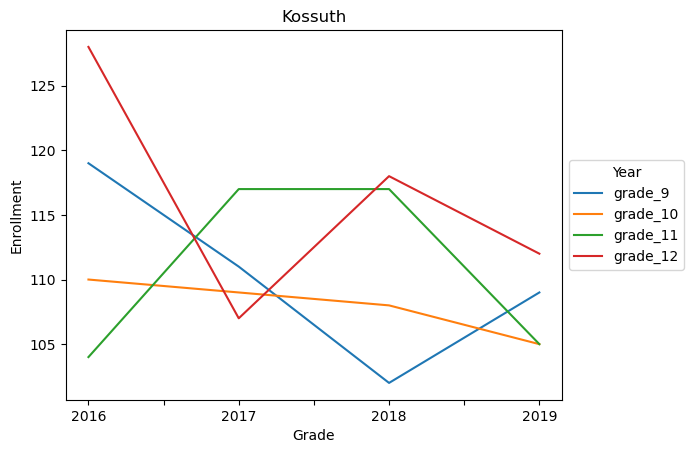

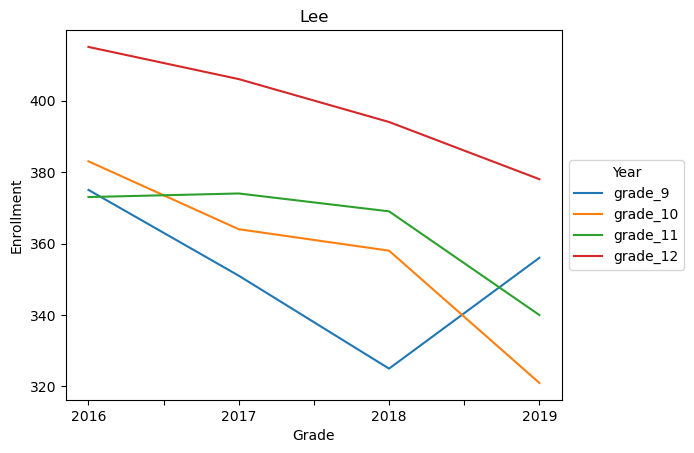

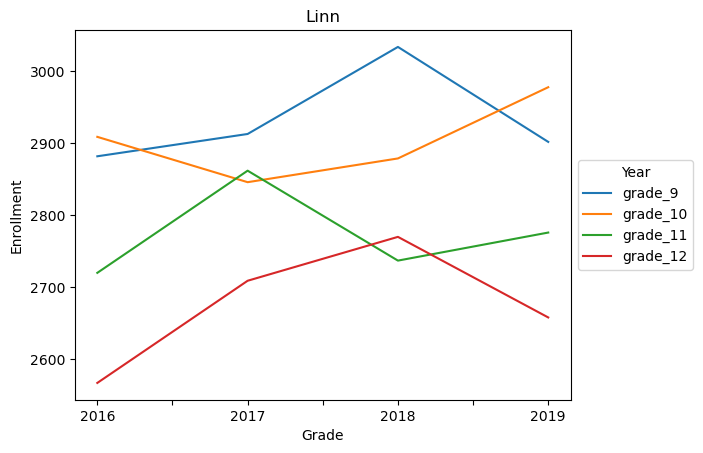

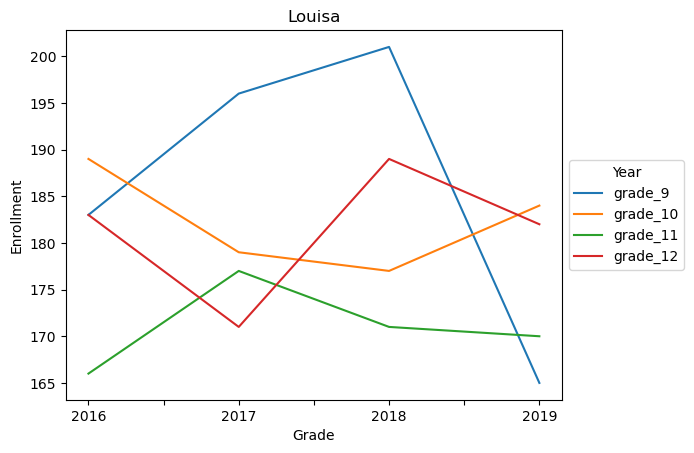

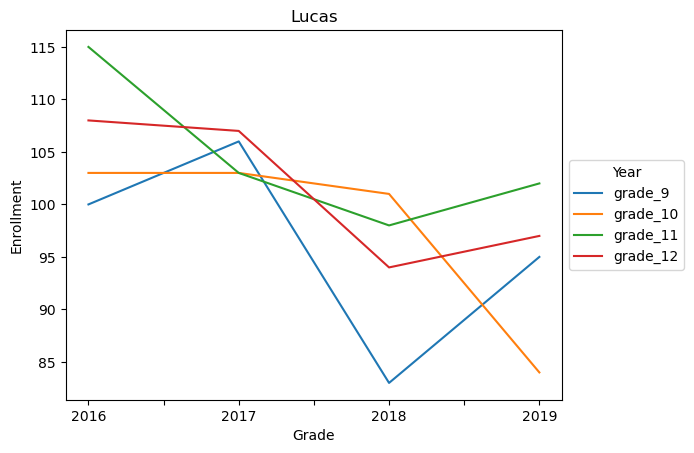

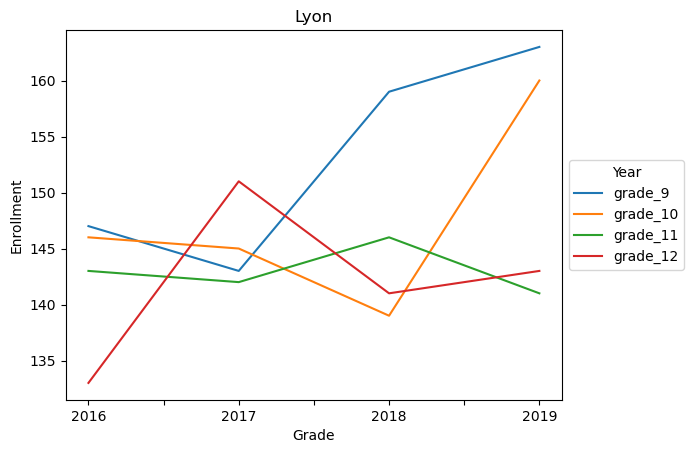

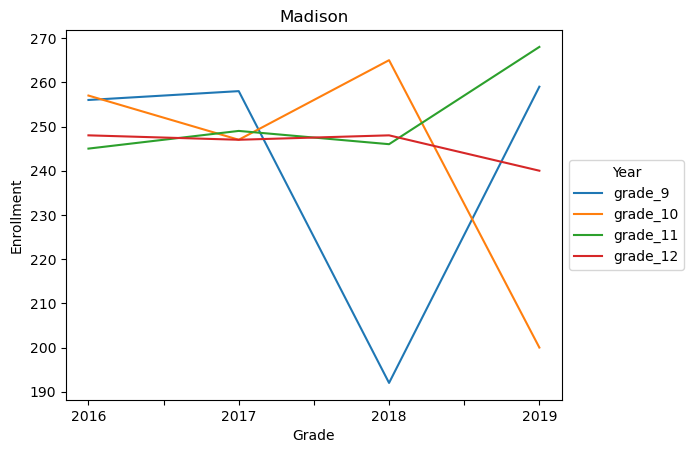

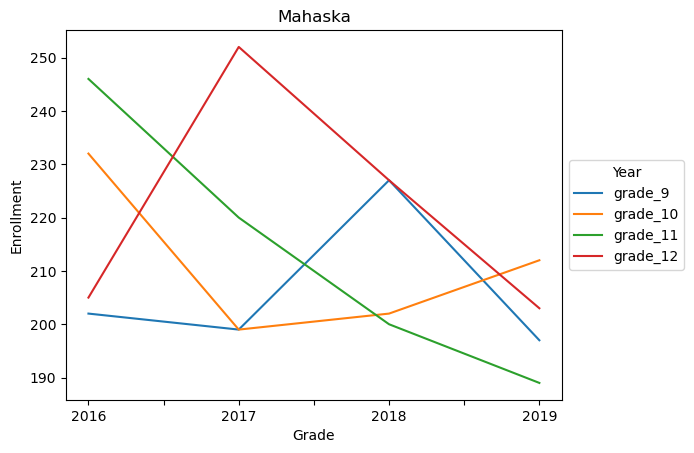

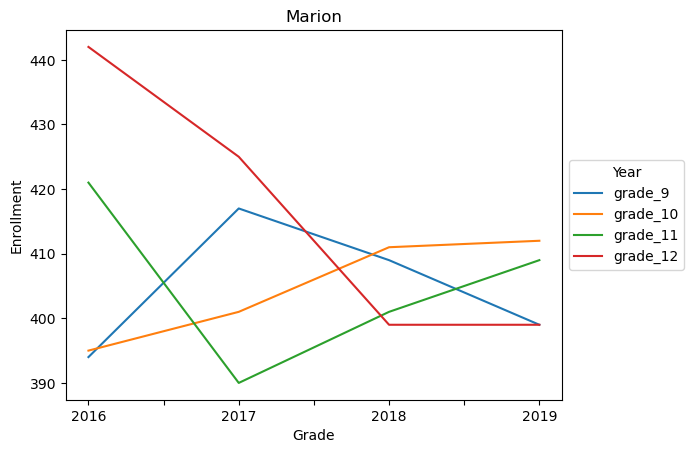

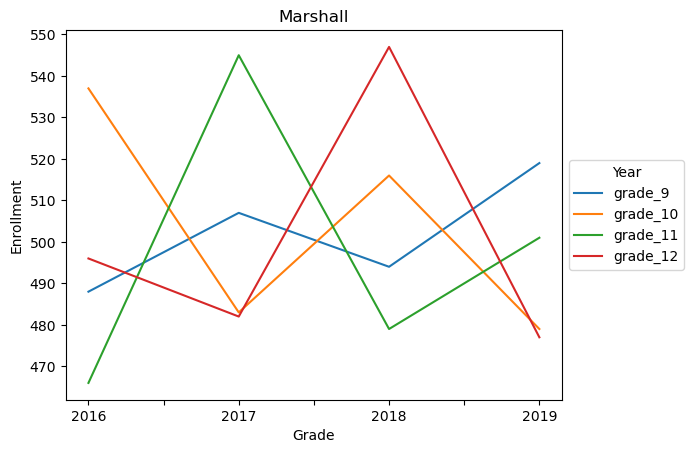

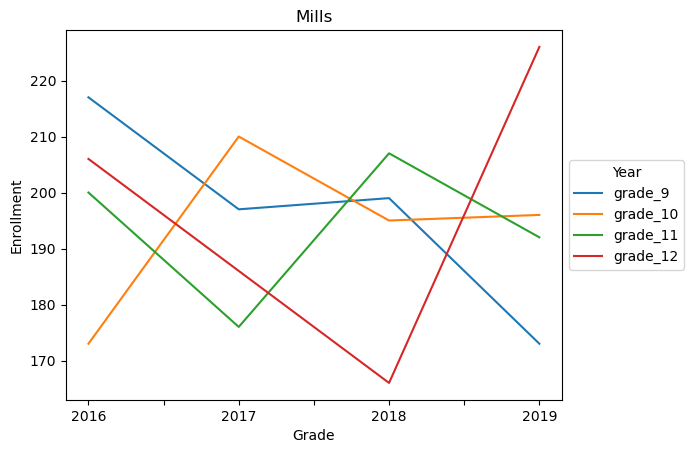

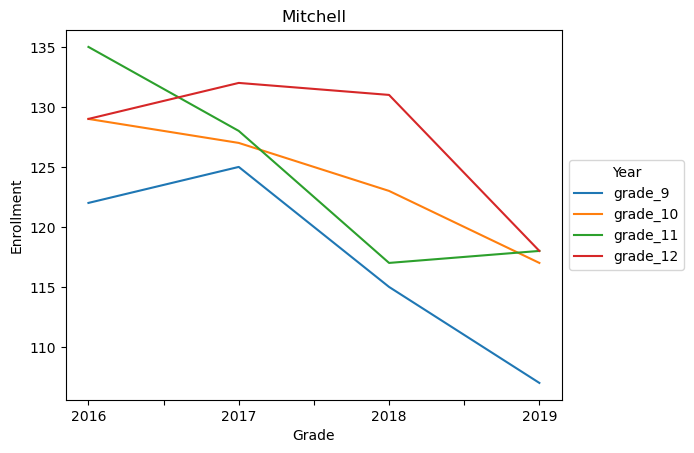

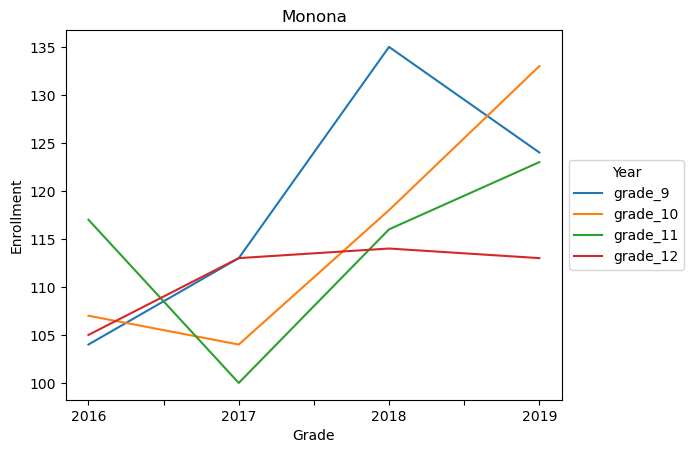

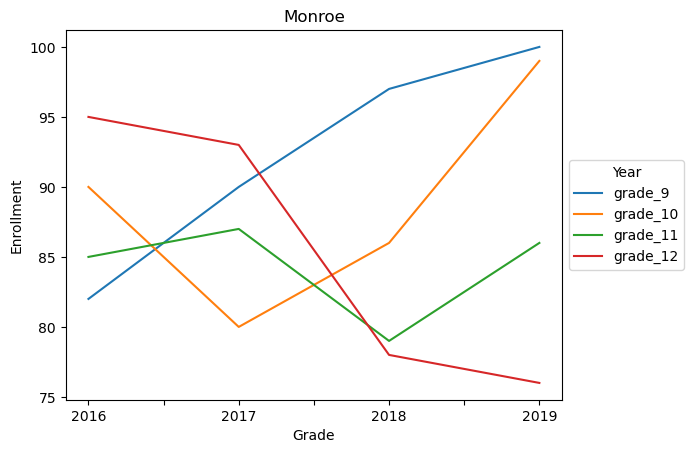

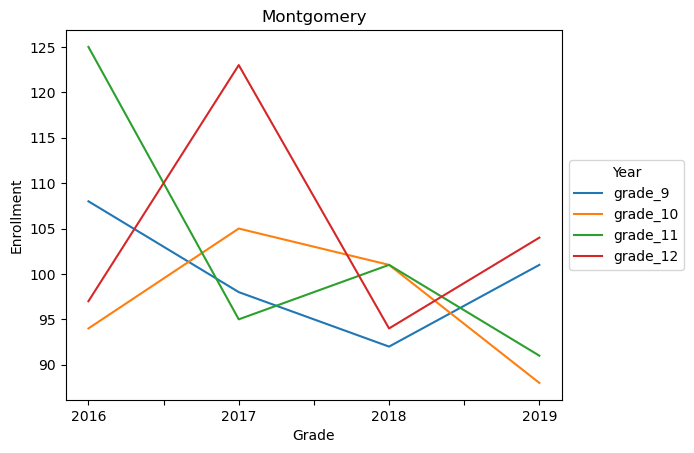

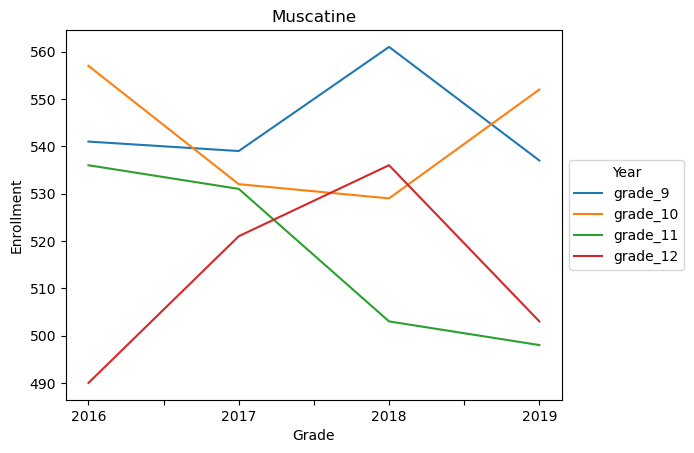

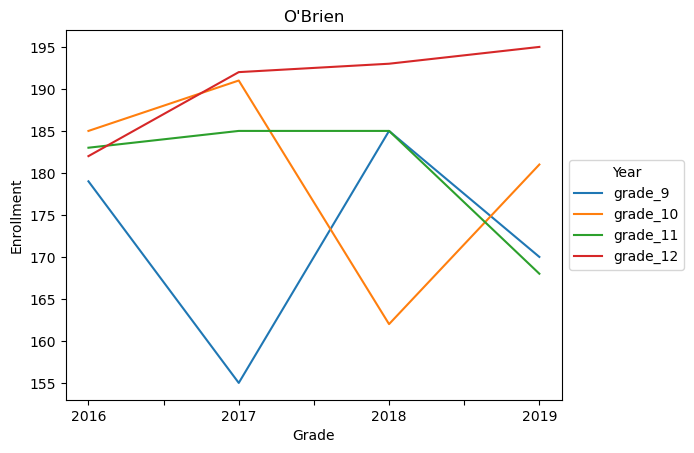

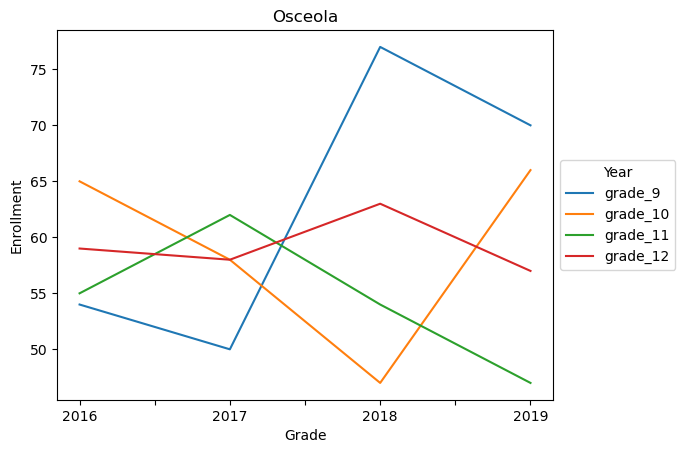

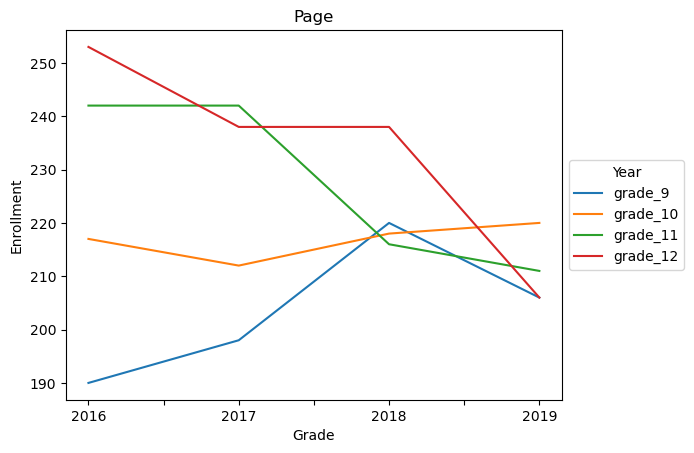

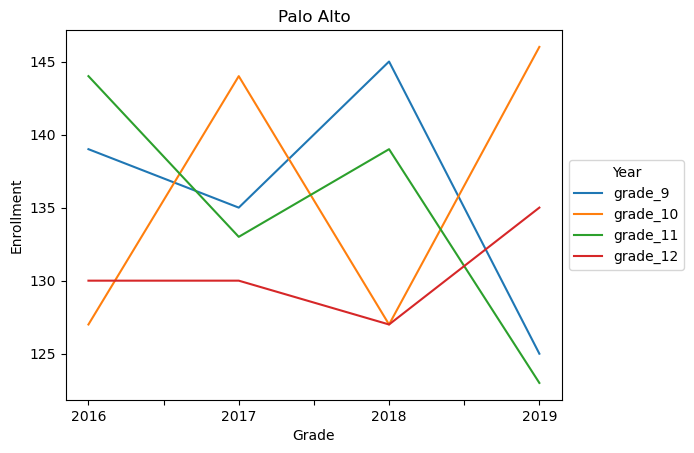

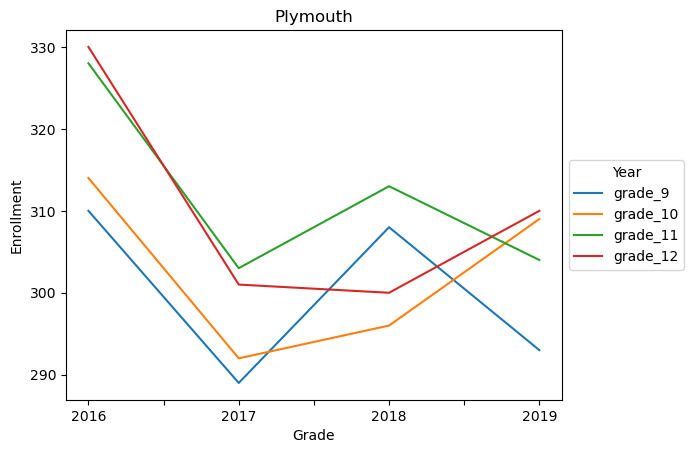

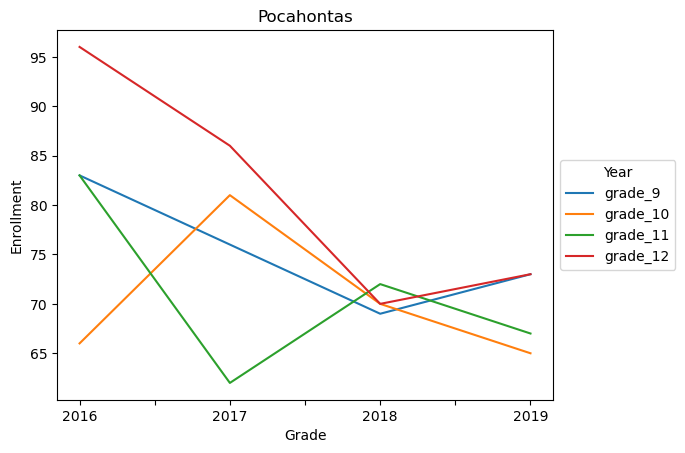

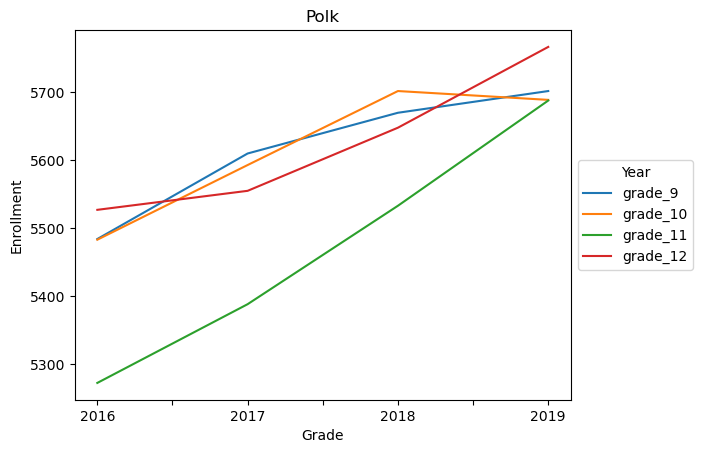

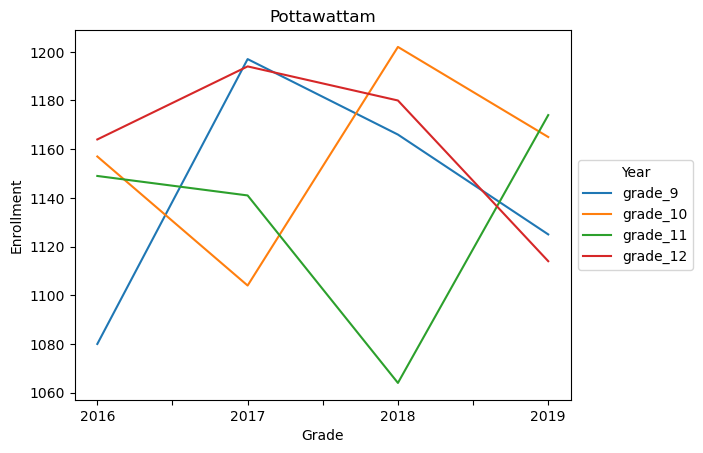

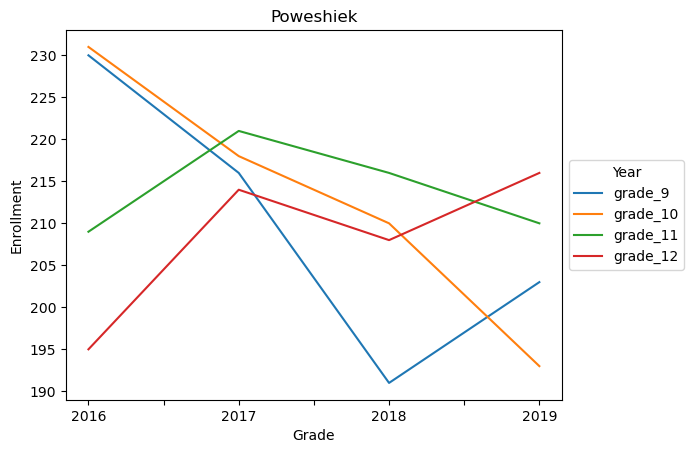

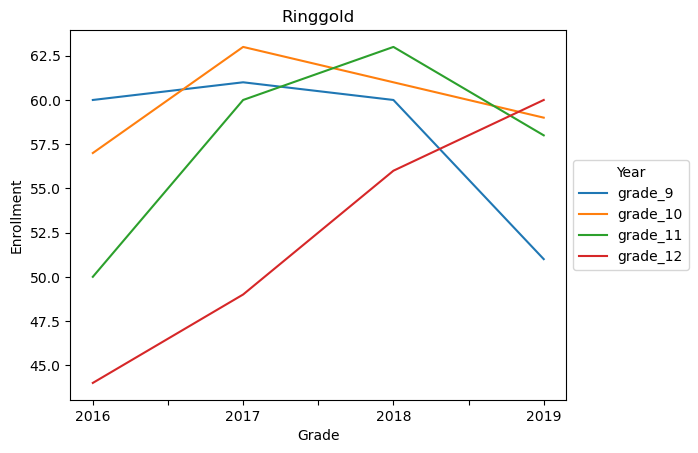

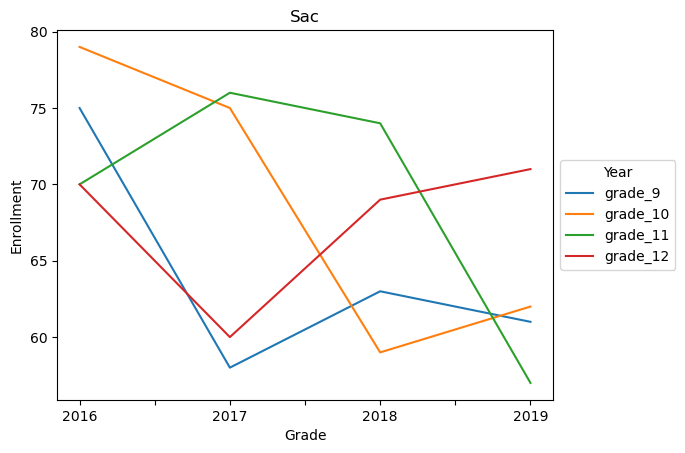

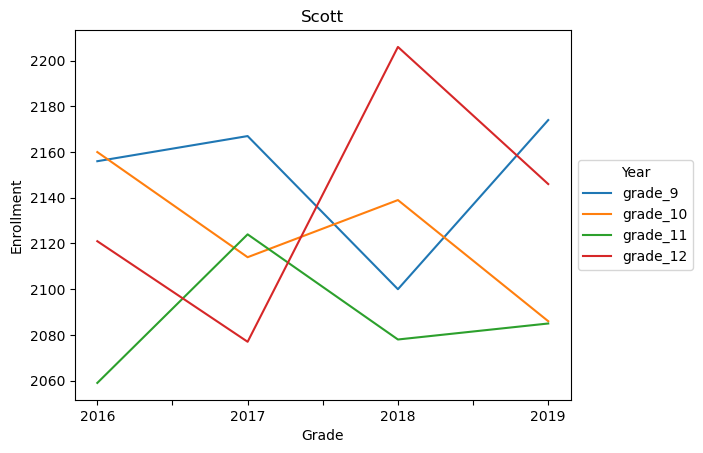

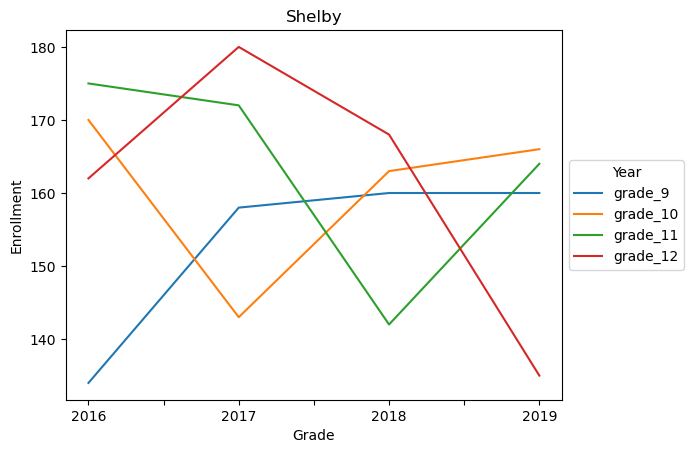

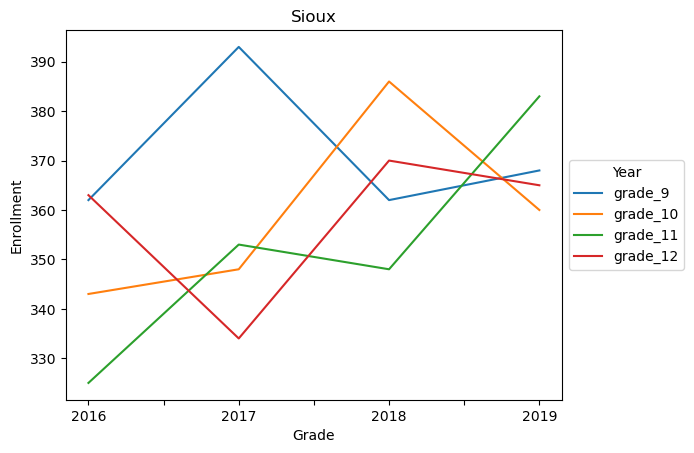

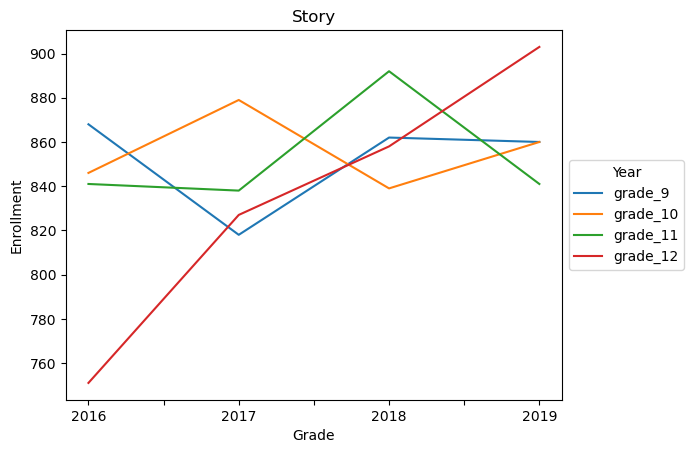

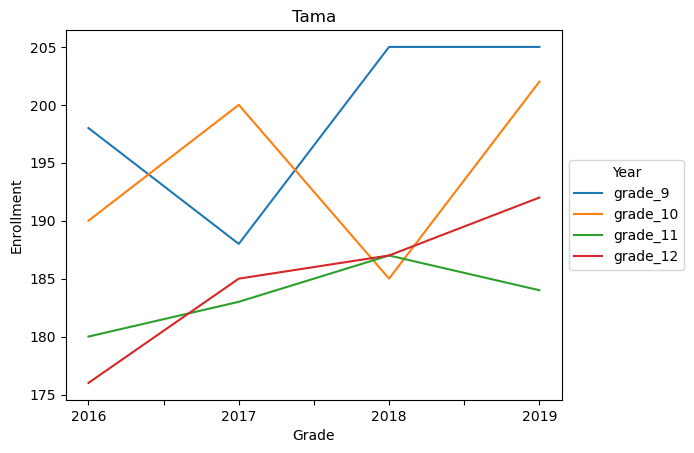

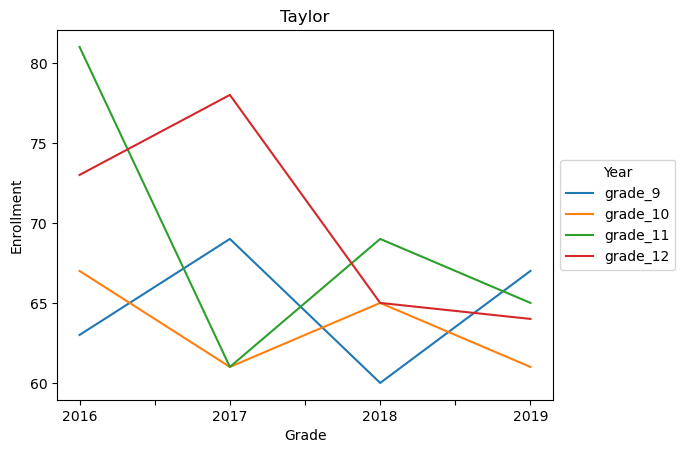

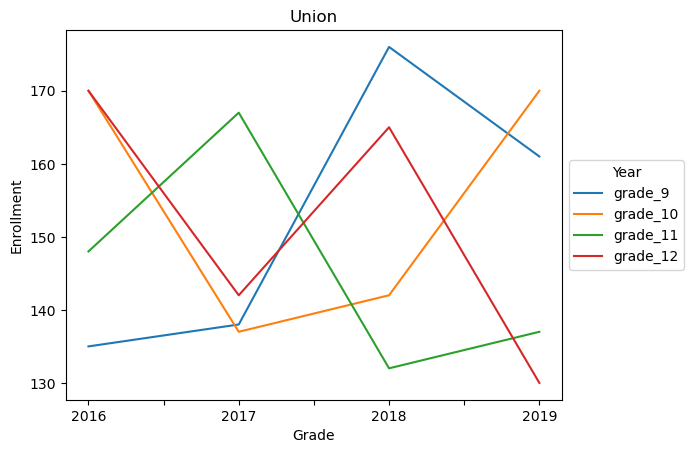

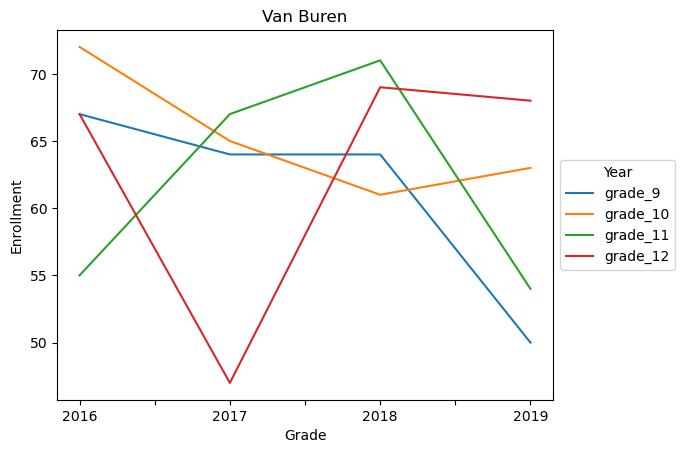

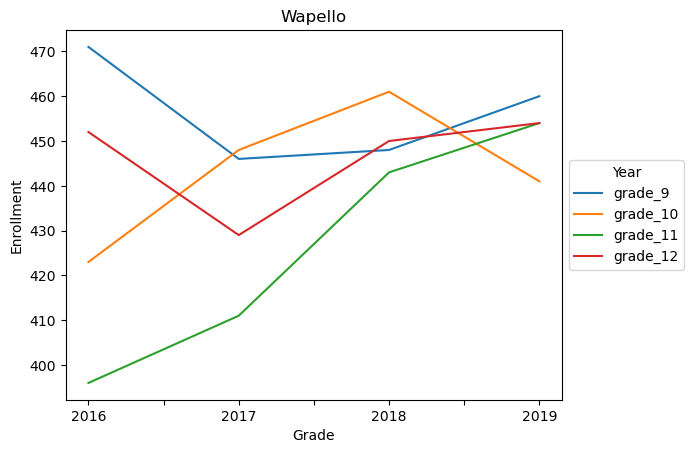

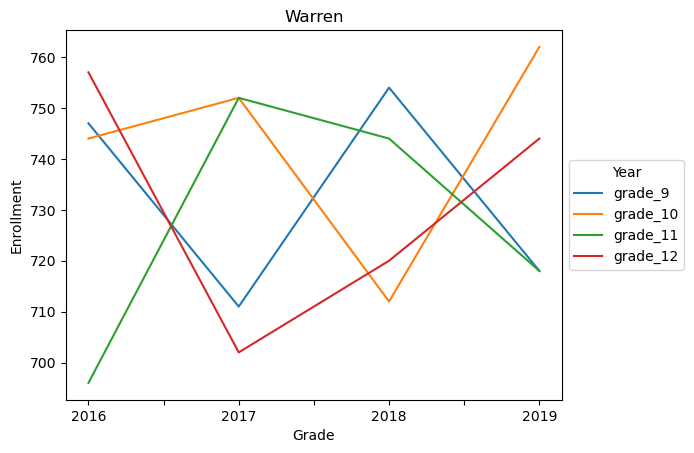

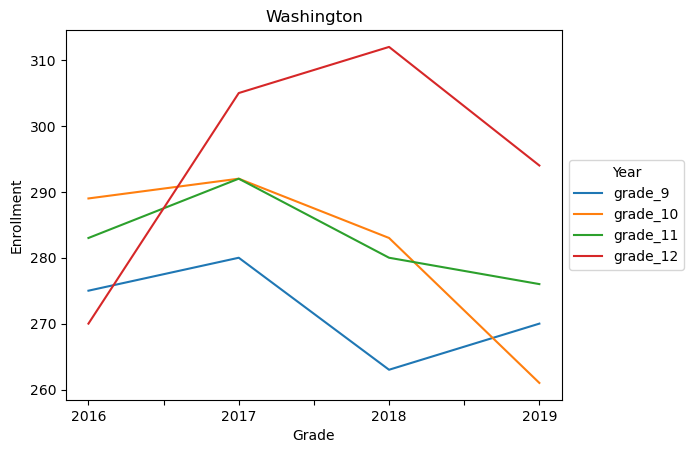

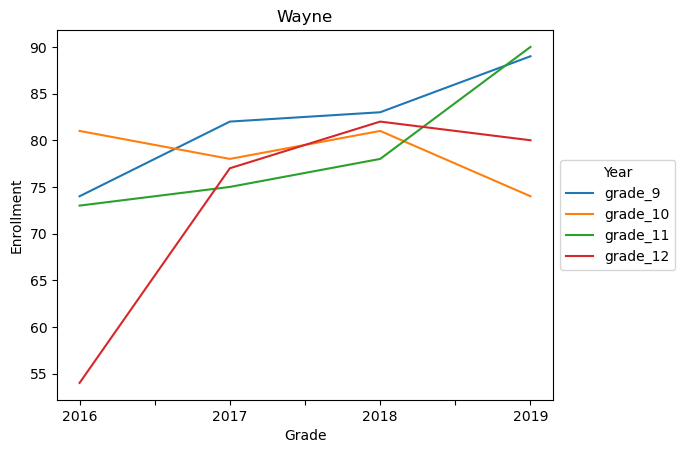

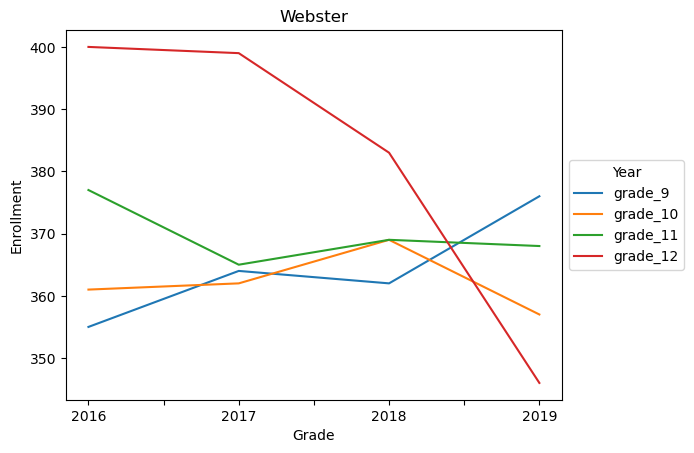

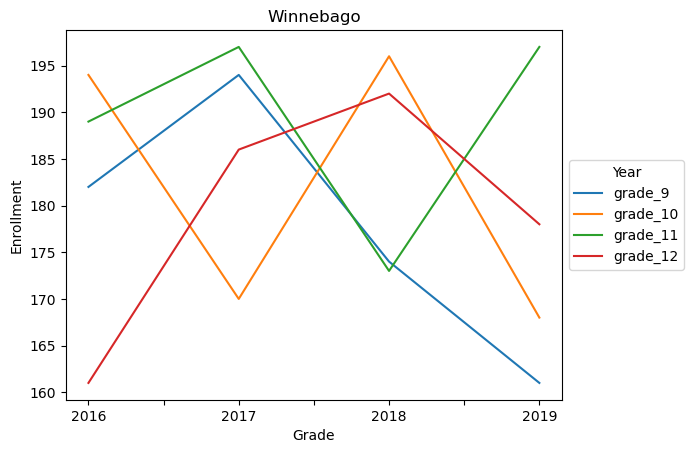

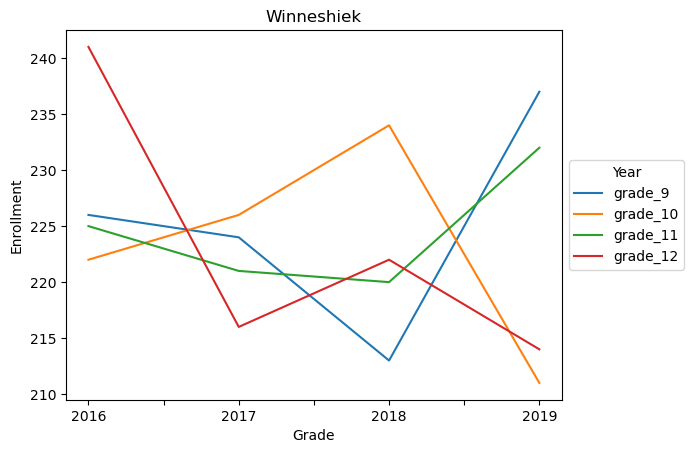

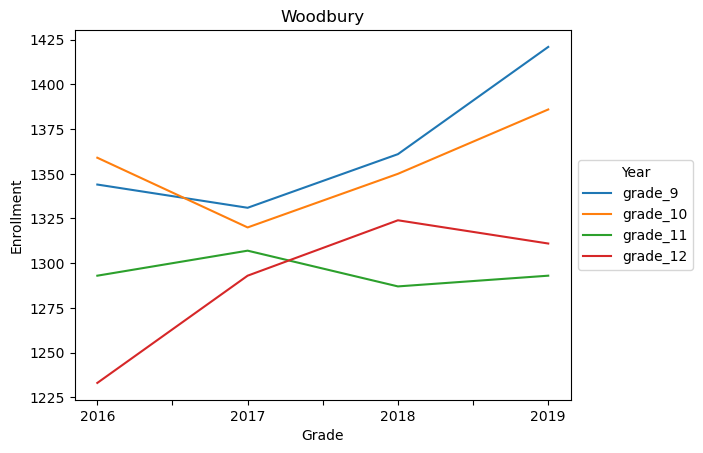

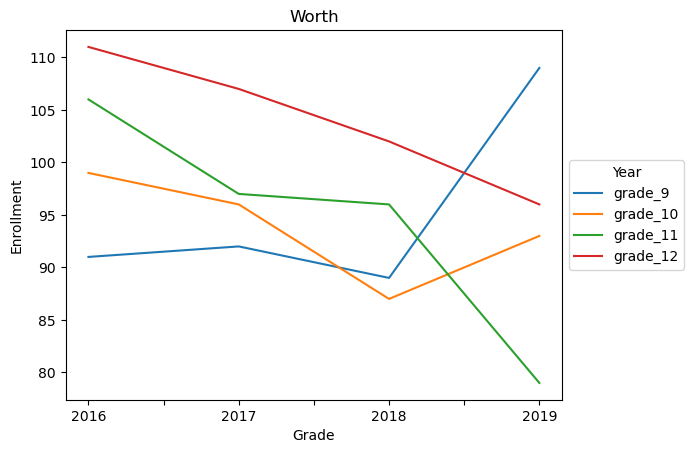

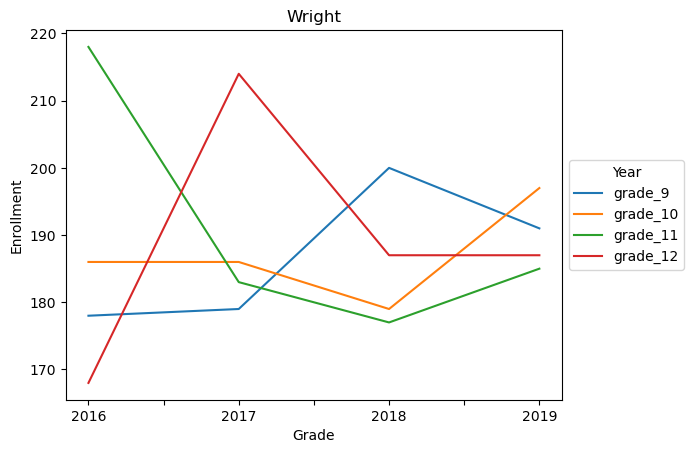

In [80]:
# Grouping the data by county and grade, and sum the enrollment columns
enrollment_by_county_grade = iowa_public_school_enrollment_df.groupby(['county_name', 'school_year'])[['grade_9', 'grade_10', 'grade_11', 'grade_12']].sum()

for county in enrollment_by_county_grade.index.get_level_values('county_name').unique():
    county_data = enrollment_by_county_grade.loc[county]
    county_data.plot(kind='line')
    plt.title(county)
    plt.xlabel('Grade')
    plt.ylabel('Enrollment')
    plt.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

### 8.6. Average Number of Students by Ethnicity in Top 10 Counties

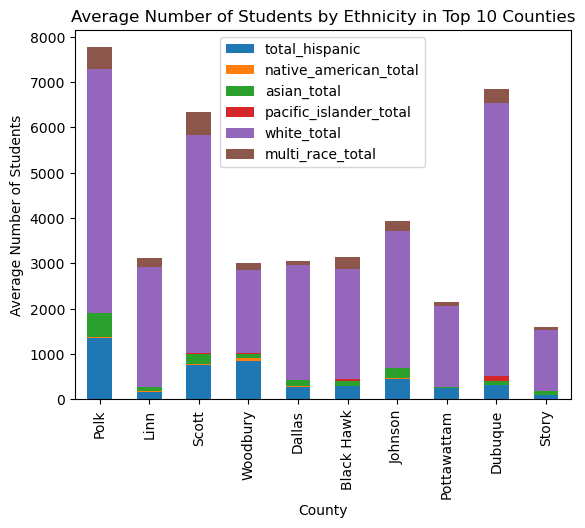

In [81]:
import pandas as pd
import matplotlib.pyplot as plt


ethnicity_cols = ['total_hispanic', 'native_american_total', 'asian_total', 'black_total',                   'pacific_islander_total', 'white_total', 'multi_race_total']
county_col = 'county_name'

avg_ethnicity_by_county = iowa_public_school_enrollment_df.groupby(county_col)[ethnicity_cols].mean()

top_counties = iowa_public_school_enrollment_df.groupby(county_col)['total_male', 'total_female'].sum().sum(axis=1).nlargest(10).index.tolist()

avg_ethnicity_by_county = avg_ethnicity_by_county.loc[top_counties]

avg_ethnicity_by_county.plot(kind='bar', stacked=True)
plt.xlabel('County')
plt.ylabel('Average Number of Students')
plt.title('Average Number of Students by Ethnicity in Top 10 Counties')
plt.show()


In [82]:
avg_ethnicity_by_county

total_hispanic  native_american_total  asian_total  \
county_name                                                       
Polk            1351.138889              25.083333   520.916667   
Linn             175.272727               9.250000    82.909091   
Scott            761.937500              17.875000   230.000000   
Woodbury         843.916667              79.333333    85.416667   
Dallas           282.500000               6.583333   138.125000   
Black Hawk       297.250000               7.150000   104.700000   
Johnson          456.562500              12.000000   226.125000   
Pottawattam      242.000000              13.379310    16.275862   
Dubuque          322.000000               8.000000    75.625000   
Story            102.357143               4.214286    75.214286   

             pacific_islander_total  white_total  multi_race_total  
county_name                                                         
Polk                      12.694444  5384.722222        465.000000  
Linn                      10.204545  2637.477273        203.727273  
Scott                      4.875000  4815.625000        497.062500  
Woodbury                  12.041667  1836.750000        148.958333  
Dallas                     1.708333  2527.958333        102.083333  
Black Hawk                39.300000  2433.250000        250.300000  
Johnson                    4.812500  3019.437500        222.687500  
Pottawattam                3.344828  1793.517241         70.172414  
Dubuque                  122.000000  6004.000000        316.750000  
Story                      1.714286  1351.285714         63.892857

## 9. Storing preprocessed data back to Mongo DB

In [83]:
client = MongoClient(f'mongodb://{USER_NAME}:{USER_PASSWORD}@{HOST}:{PORT}/{DATABASE_NAME}')
db = client[DATABASE_NAME]
iowa_graduation_rate_collection = db['iowa_public_school_enrollment_preprocessed']
iowa_graduation_rate_collection.drop()
result = iowa_graduation_rate_collection.insert_many(json.loads(iowa_public_school_enrollment_df.to_json(orient='records')))
client.close()